<a href="https://colab.research.google.com/github/yuvaravii/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project/blob/main/capstone_project_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


The requirement is :
1. How many no. of bikes required at each hour for smooth supply

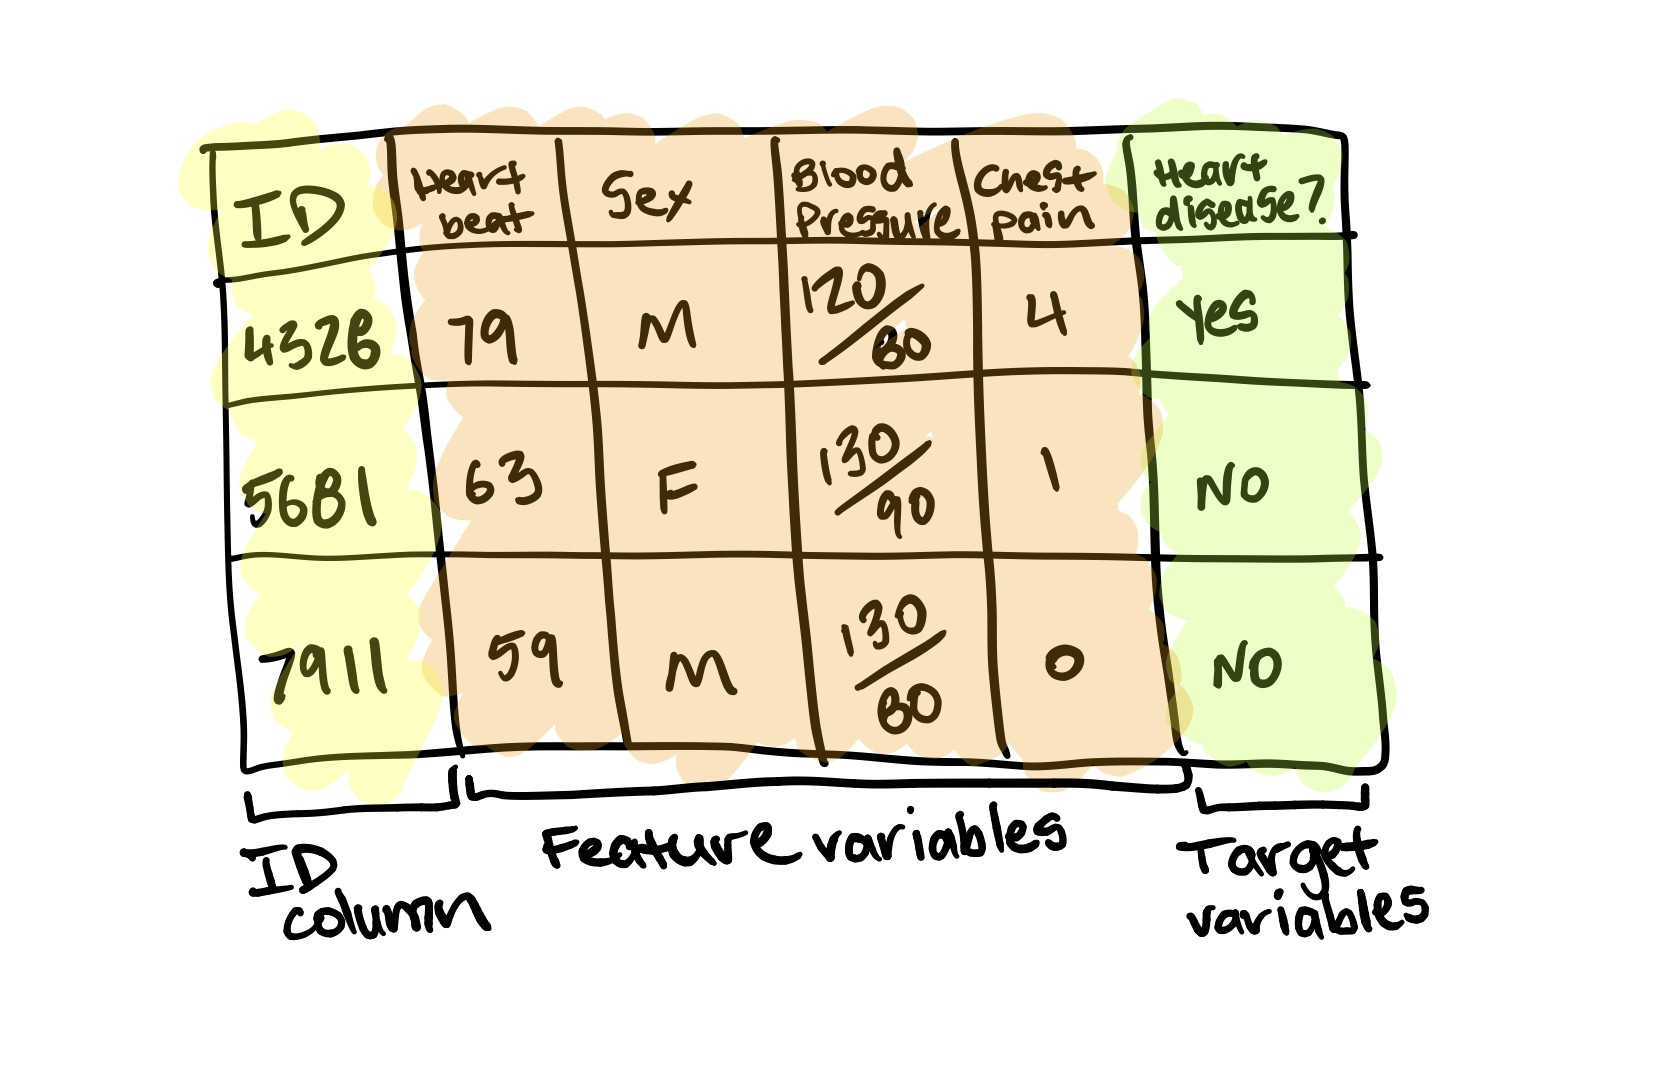

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [617]:
#importing necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [618]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [619]:
# Load data
filepath='/content/drive/MyDrive/Colab Notebooks/Capstone Project/ML- Regression type/Copy of SeoulBikeData.csv'
raw_df=pd.read_csv(filepath,encoding= 'unicode_escape')
df=raw_df.copy()

In [620]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [621]:
#for easiness let me rename some columns names as per description
df=df.rename(columns={'Rented Bike Count':'bike_count_per_hour','Hour':'nth_hour'})
df.head(3)

Date  bike_count_per_hour  ...     Holiday  Functioning Day
0  01/12/2017                  254  ...  No Holiday              Yes
1  01/12/2017                  204  ...  No Holiday              Yes
2  01/12/2017                  173  ...  No Holiday              Yes

[3 rows x 14 columns]

Classifying the features into target features and deciding features:
In other words into independent(deciding features) and dependant variable(target features).
Sometime even there exist a strong correlation betweeen the independent variable(Multicollinearity). We usually identify this correlation by corr_df then we check for inter dependancies.

In [622]:
# DV : dependant_variable , IDV : Independant variable
idv=df.columns.drop('bike_count_per_hour')
dv='bike_count_per_hour'

#creating the df using dv and idv
dv_df=df[dv]
idv_df=df[idv]

In [623]:
df.describe([.1,.2,.3,.4,.6,.7,.8,.9,.95])

bike_count_per_hour     nth_hour  ...  Rainfall(mm)  Snowfall (cm)
count          8760.000000  8760.000000  ...   8760.000000    8760.000000
mean            704.602055    11.500000  ...      0.148687       0.075068
std             644.997468     6.922582  ...      1.128193       0.436746
min               0.000000     0.000000  ...      0.000000       0.000000
10%              64.000000     2.000000  ...      0.000000       0.000000
20%             153.800000     4.000000  ...      0.000000       0.000000
30%             234.000000     7.000000  ...      0.000000       0.000000
40%             335.000000     9.000000  ...      0.000000       0.000000
50%             504.500000    11.500000  ...      0.000000       0.000000
60%             709.000000    14.000000  ...      0.000000       0.000000
70%             944.000000    16.000000  ...      0.000000       0.000000
80%            1200.000000    19.000000  ...      0.000000       0.000000
90%            1671.100000    21.000000  ...      0.000000       0.000000
95%            2043.000000    22.000000  ...      0.400000       0.200000
max            3556.000000    23.000000  ...     35.000000       8.800000

[15 rows x 10 columns]

**Observations**
1. Here the problem statement is how many bikes required at nth hour for smooth supply.
Here the No bike supply has no reason to stay in data set
2. check the columns of snowfall and rainfall as at only 90% they show up value
3. In temperature since the dataset is about bike, in reality no one drives bike at temperature of -17 deg. so better we omit data less than 0 deg or else we can replace the negative value as 0.
4. In below analysis we can find that the temperature and dew point temp are highly correlated thus we can omit this columns.

In [624]:
df.columns

Index(['Date', 'bike_count_per_hour', 'nth_hour', 'Temperature(°C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')

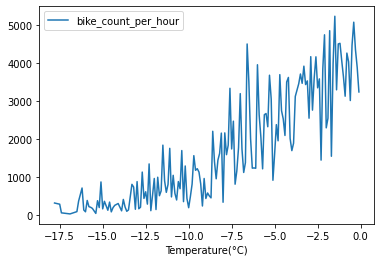

In [625]:
df[df['Temperature(°C)']<0].groupby('Temperature(°C)').agg({'bike_count_per_hour':sum}).sort_values('Temperature(°C)',ascending=False).plot(kind='line')
# so we cannot touch the temperature parameter

In [626]:
df.head()

Date  bike_count_per_hour  ...     Holiday  Functioning Day
0  01/12/2017                  254  ...  No Holiday              Yes
1  01/12/2017                  204  ...  No Holiday              Yes
2  01/12/2017                  173  ...  No Holiday              Yes
3  01/12/2017                  107  ...  No Holiday              Yes
4  01/12/2017                   78  ...  No Holiday              Yes

[5 rows x 14 columns]

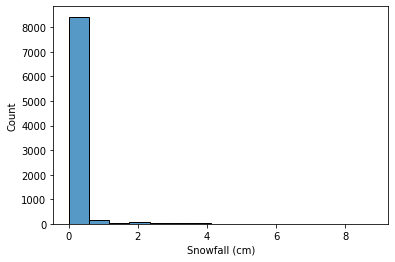

In [627]:
sns.histplot(df['Snowfall (cm)'])

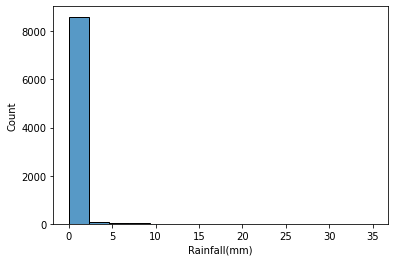

In [628]:
sns.histplot(df['Rainfall(mm)'])

In [629]:
# checking for the missing values
df.isnull().sum()

Date                         0
bike_count_per_hour          0
nth_hour                     0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [630]:
# what are the type of data we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   bike_count_per_hour        8760 non-null   int64  
 2   nth_hour                   8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Since 'Date' is availabe that can be a useful information.
As they can be used to ask 
1. Which year there was more sales ?
2. Which month there were more sales?
3. Is it during the weekdays are weekends the count were higher?
4. Which season the count were higher?

So we have to convert the date into useful columns.

Inorder to give meaning to the object data we have to convert into numerical data as the maths revolve around numbers. So we try to convert the object dtypes into numericals.

The computer does not need classification as only humans need for better understanding.

Which we will do during imputation of algorithm

The computer loves numericals than words. (Their language is binary as we all know)

In [631]:
# categorising the numerical and categorical column
num_col=[col for col in df if df[col].dtypes!='O']
cat_col=[col for col in df if df[col].dtypes=='O']

num_col_df=df[num_col]
cat_col_df=df[cat_col]

In [632]:
# Finding the outliers

# First quartile (Q1)
Q1 = np.percentile(num_col_df, 25, interpolation = 'midpoint')

print('The value of Q1 is {}'.format(Q1))
print('__'*50)
  
# Third quartile (Q3)
Q3 = np.percentile(num_col_df, 75, interpolation = 'midpoint')

print('The value of Q3 is {}'.format(Q3))
print('__'*50)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

print('The value of IQR is {}'.format(IQR))
print('__'*50)


LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

print('The Lower limit is {}'.format(LL))
print('__'*50)

print('The Upper limit is {}'.format(UL))
print('__'*50)


# using the library
from scipy import stats
iQR=stats.iqr(num_col_df,interpolation='midpoint')

print('The value of IQR is {}'.format(iQR))
print('__'*50)


The value of Q1 is 0.0
____________________________________________________________________________________________________
The value of Q3 is 52.0
____________________________________________________________________________________________________
The value of IQR is 52.0
____________________________________________________________________________________________________
The Lower limit is -78.0
____________________________________________________________________________________________________
The Upper limit is 130.0
____________________________________________________________________________________________________
The value of IQR is 52.0
____________________________________________________________________________________________________


In [633]:
def subset_by_iqr(df, column, whisker_width=1.5):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     


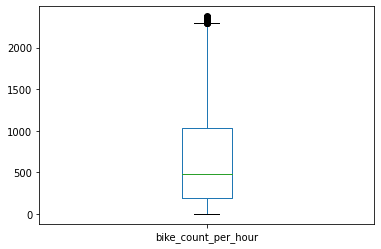

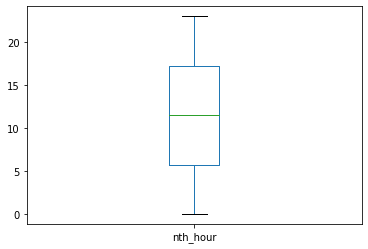

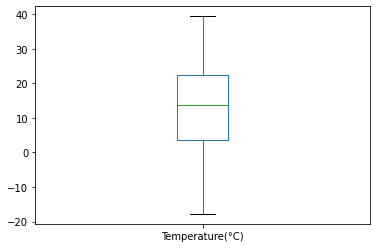

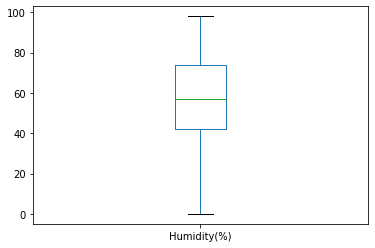

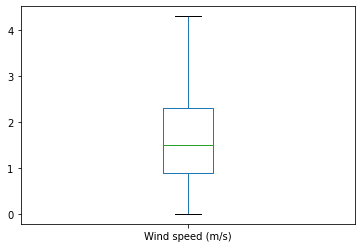

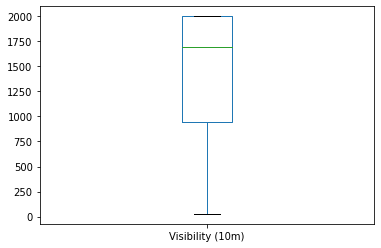

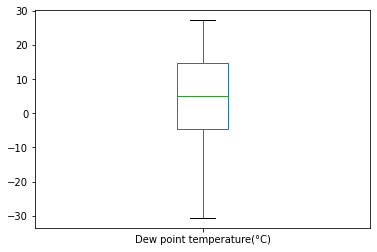

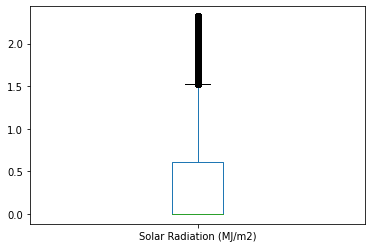

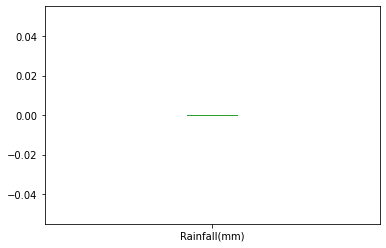

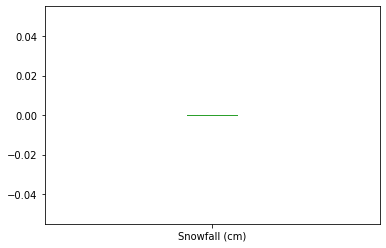

<Figure size 432x288 with 0 Axes>

In [634]:
for col in num_col_df.columns:
  subset_by_iqr(num_col_df,col)[col].plot.box()
  plt.figure()

  # from diagram we can infer only the columns rented bike and solar radiation has outliers.
  # oops we cannot omit values of rented bike as they provide some reason also it is the target variable.

## Univariate Analysis

We now have to visualise each variable how their distributions are,
For that to happen we have categories the variable into numerical(continues values) and categorical columns.
As the distribution plots,scatterplot are best for continuous values.
Count charts,barplot,.

for better clarity in charts we can visit:
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

In [635]:
cat_col

['Date', 'Seasons', 'Holiday', 'Functioning Day']

In [636]:
dv

'bike_count_per_hour'

In [637]:
df['Seasons'].value_counts()
dv

'bike_count_per_hour'

Let see how the cat_col monochromatically reacts with count values

Almost all the season has same amount of data distributed but this does not explain the bike_count/hour in seasons.
To attain lets groupby it

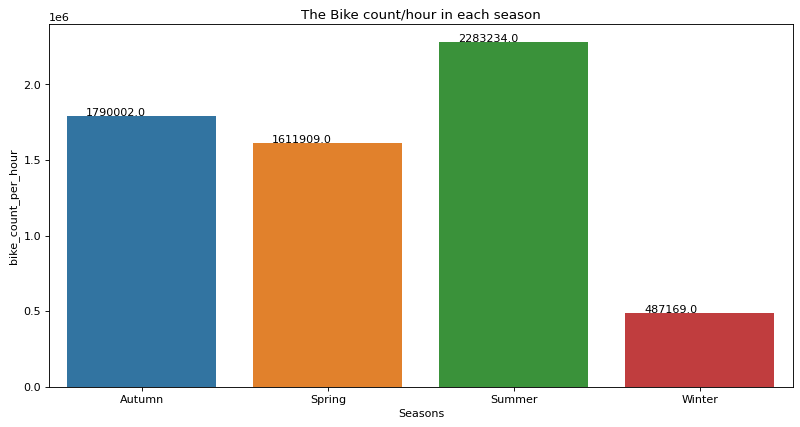

In [638]:
# Grouping of season
gb_season=pd.DataFrame(df.groupby('Seasons').agg({'bike_count_per_hour':sum}).reset_index())
gb_season
fig, ax = plt.subplots(figsize=(12,6), dpi= 80)  
sns.barplot(x='Seasons',y='bike_count_per_hour',data=gb_season)
plt.title('The Bike count/hour in each season')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


It seems the summer season has more bike rented than other seasons.
Its natural as people love travelling places with lower budget.
Winter has lower rentals as people dont like to get caught cold and other parameters

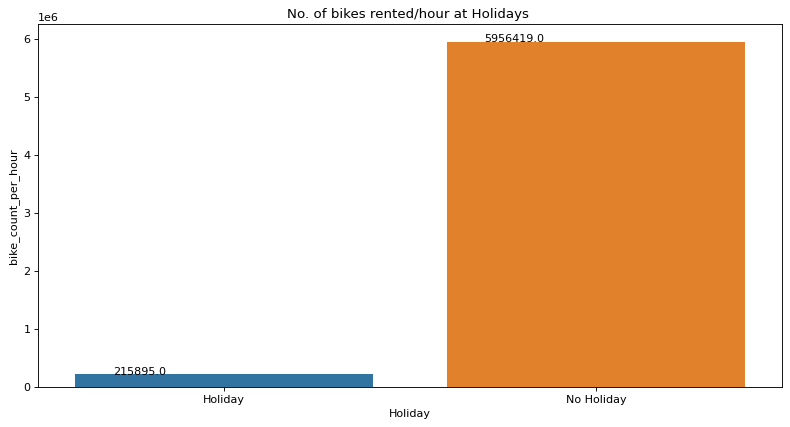

In [639]:
# checking for holiday
gb_holiday=pd.DataFrame(df.groupby('Holiday').agg({'bike_count_per_hour':sum}).reset_index())
fig, ax = plt.subplots(figsize=(12,6), dpi= 80)  
sns.barplot(x='Holiday',y='bike_count_per_hour',data=gb_holiday)
plt.title('No. of bikes rented/hour at Holidays ')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

The Graph shows that No holiday has more rentals than other day.
May be our rental customers(targets) are school students, college students, professional and workmen.
On holiday rentals are low for obvious reason as people want to spend the weekend at home.

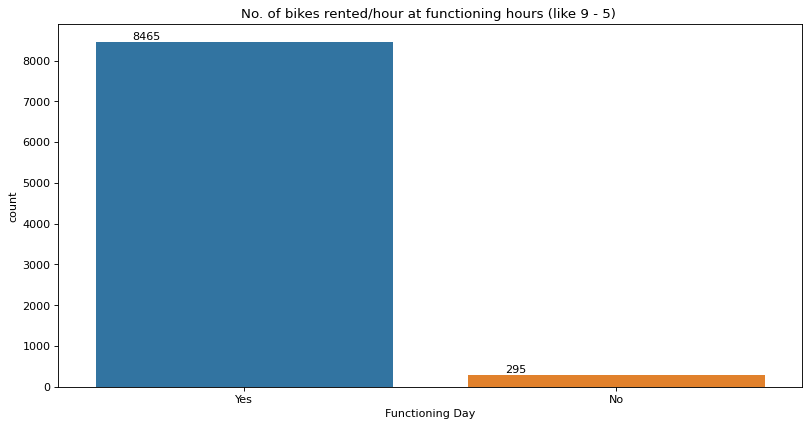

In [640]:
# checking for holiday
#gb_function=pd.DataFrame(df.groupby('Functioning Day').agg({'bike_count_per_hour':sum}).reset_index())
gb_function=df.copy()
fig, ax = plt.subplots(figsize=(12,6), dpi= 80)  
#sns.barplot(x='Functioning Day',y='Rented Bike Count',data=gb_function)

sns.countplot(x='Functioning Day',data=gb_function)
plt.title('No. of bikes rented/hour at functioning hours (like 9 - 5) ')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

this graph shows all the rentals were on working hours which means our assumptions may be true.

**So the availability of rentals shall be high on the functioning hours and Non Holiday days (Week days in short)**

In [641]:
#Analysis of numerical columns with the output variables
num_col

['bike_count_per_hour',
 'nth_hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

Since the features are numerical in nature we shall the **distribution** plot and see how the data is **distributed**.
Treatment of distribution of continuous data (density kinda)
If we observe any skewness we have 3 type of treatment:
1. Log transformation
2. Inverse transformation
3. Square root tranformation

Major cons of using log and inverse transformation
1. if any value is '0' then log0 = infinity and in inverse it becomes 1/0 =infinity, so if the dataset has 0 in it and we cannot replace zero with other means then we better avoid usage of log and inverse transformation as medium to cure skewness.

Pros
1. Reduction of number length, thus easy for mathing.
2. the difference in values becomes low (eg diff between 30 and 10 is 20 after log trnf. 3-1=2). Only the scaling is performed, no change in true values.
3. Easy for plotting and since the values are nearer then can be plotted in scatter plot.
4. It is mandatory to perform such scaling in distance based algorithm like KNN, SVM etc.
5. log 1000= 3 log 10=3  , so the data size gets reduced significantly. Thus for performing our model in fast and efficient way this is mandatory process.


For better understanding we can see example below

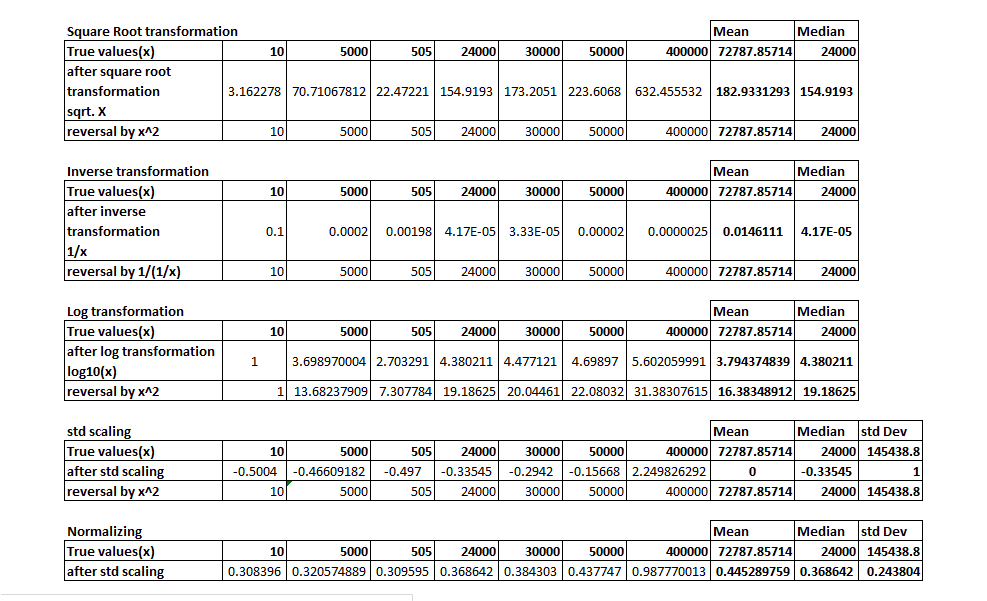

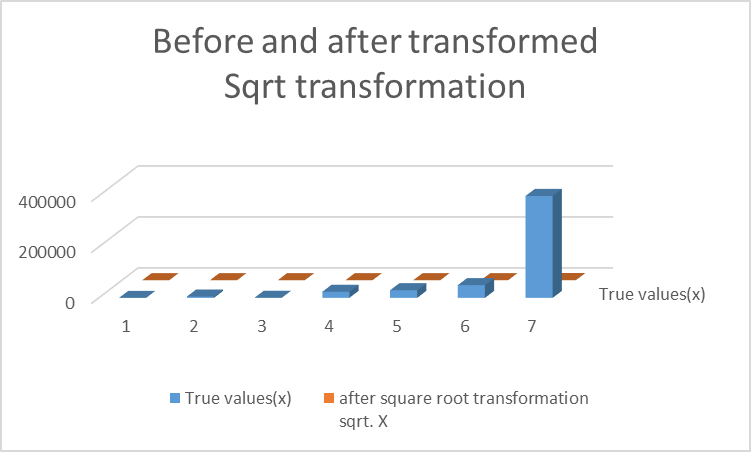

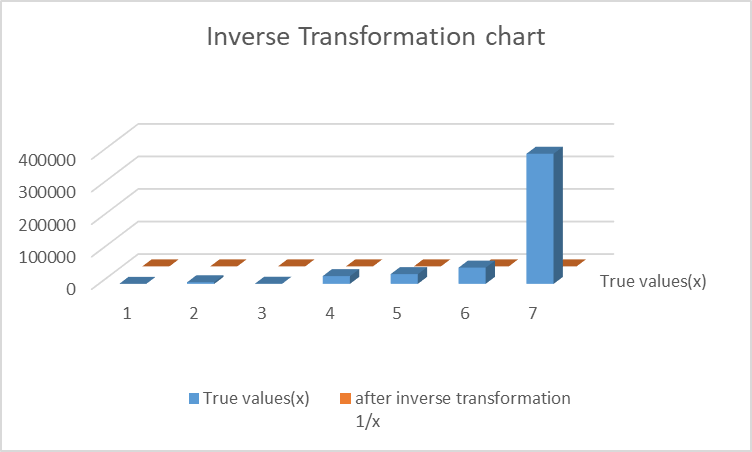

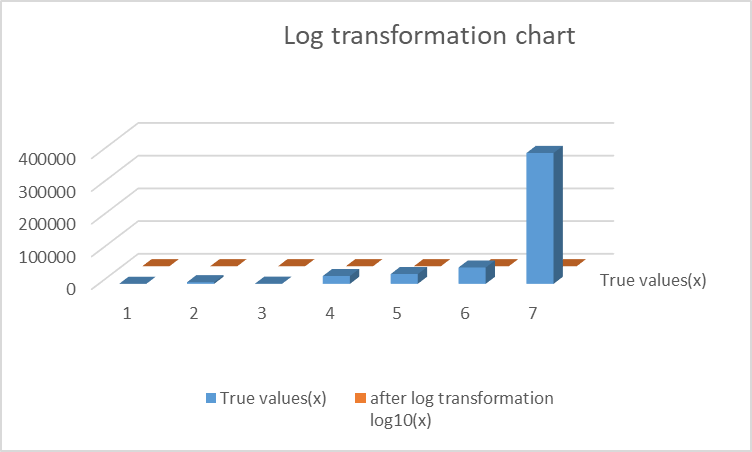

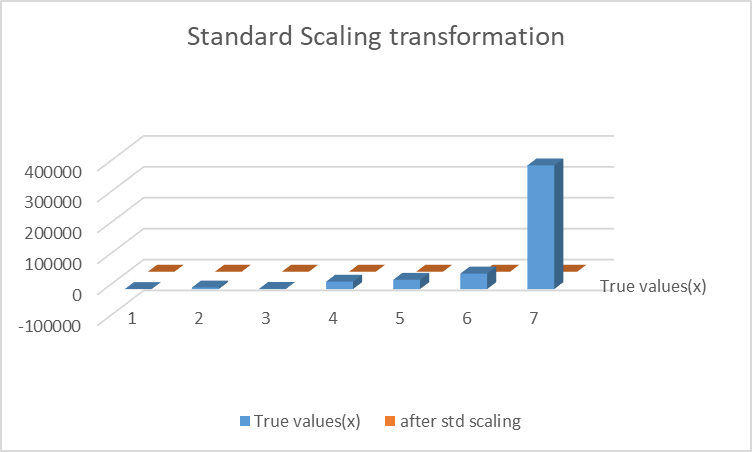

here we see that our values changes to range of -1 to 2.5

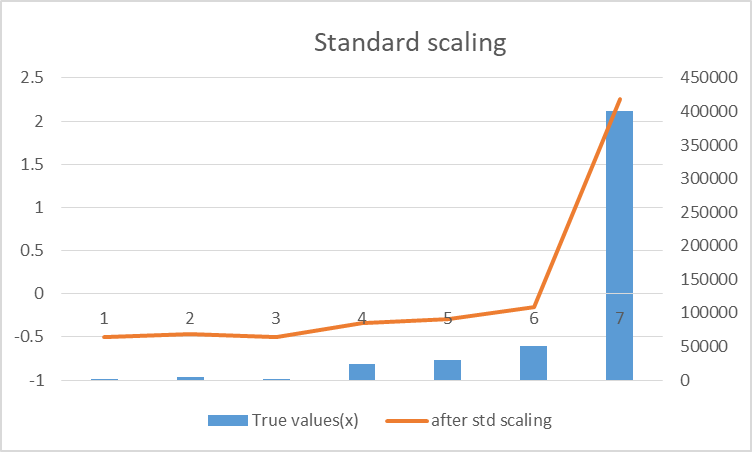

The values are transformed to 0 and 1 in normalising


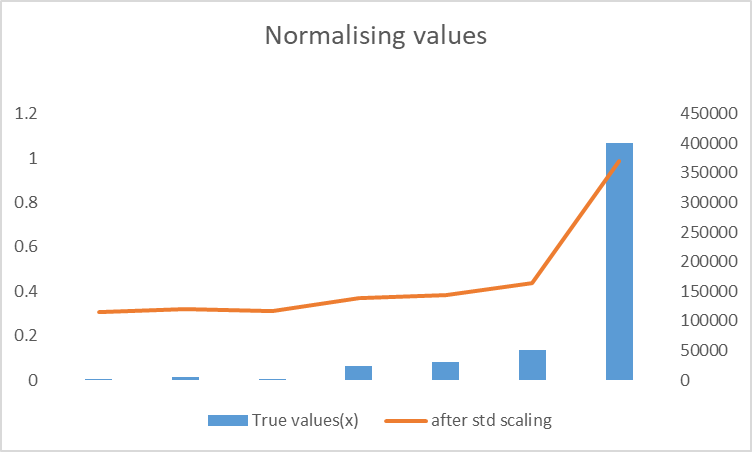

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


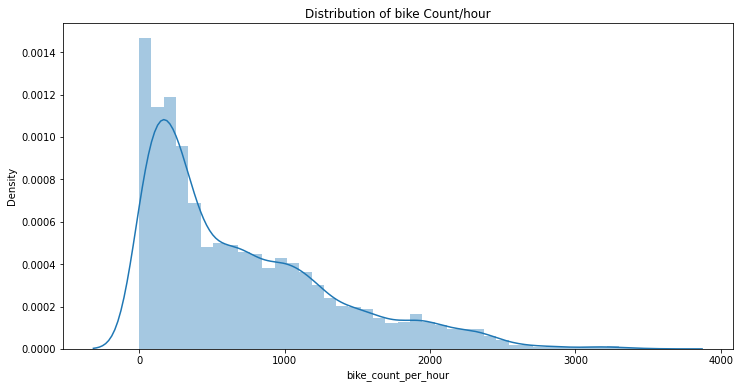

In [642]:
# as we know how  to treat outlier lets see how the distribution is for numerical col variable
# lets check for dependent variable

plt.subplots(figsize=(12,6))
sns.distplot(df[dv])
plt.title('Distribution of bike Count/hour')
plt.show()


Here the target variable is skewed positively(right skewed)
Most of the values are present on the left side of the range.
Inorder to measure the skewness we use skewness and kurtosis.


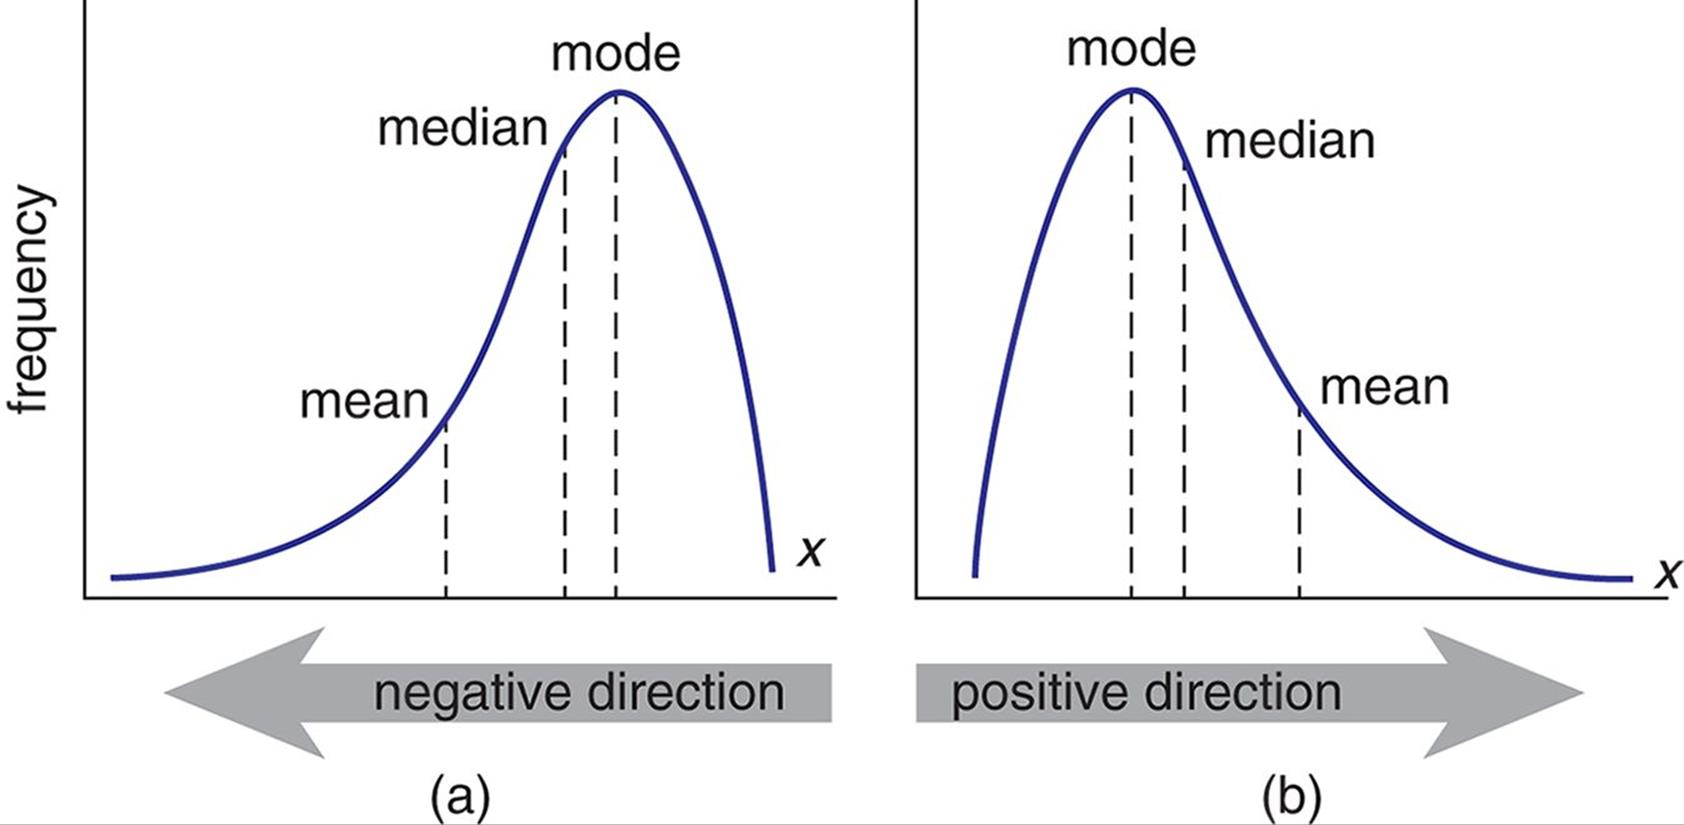

In [643]:
# Lets measure the skewness
from scipy.stats import skew

# skewness before transformation
print('the skewness before transformation is {}'.format(skew(df[dv])))

the skewness before transformation is 1.1532306631480034


Generally the skewness is ranged between -1 and 1.
if 
1. the skewness is between 0.5 to -0.5 then it is symmetrical
2. the skewness is between 0.5 to 1 or -0.5 to -1 they are lightly skewed
3. the skewness is higher than 1 or -1 then it is highly skewed

Here our value is 1.15 lies in category 3 so lets perform transformation


In [644]:
# skewness after log transformation
log_tf=np.log(df[dv])
print('the skewness after transformation is {}'.format(skew(log_tf)))

# nan means our values has some zero value inside may be so we switch to other transformation
# which means we cannot use inverse transformation neither



the skewness after transformation is nan


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1010: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


In [645]:
#Try performing the standard scalar
from sklearn.preprocessing import StandardScaler

# creating a standard scaling function(z=x-mean/std)
def standard_scaler(series):
  '''
  this function is to apply z transformation to observations
  '''
  mu=df[dv].mean()
  std=df[dv].std()
  
  z=(series-mu)/std
  return z

the skewness after standard scaler transformation is 1.1532306631480043


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


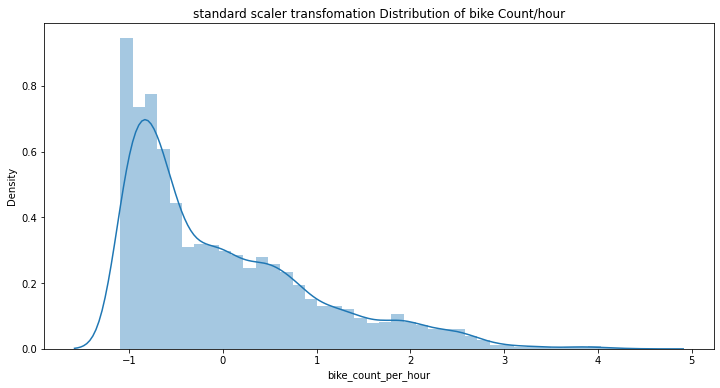

In [646]:
## STANDARDISATION

std_tf=standard_scaler(df[dv])
print('the skewness after standard scaler transformation is {}'.format(skew(std_tf)))

# this means the standard scaler does not perform skew correction
np.log(df[dv])
plt.subplots(figsize=(12,6))
sns.distplot(std_tf)
plt.title('standard scaler transfomation Distribution of bike Count/hour')
plt.show()

the skewness after normalised scaler transformation is 1.1532306631480025


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


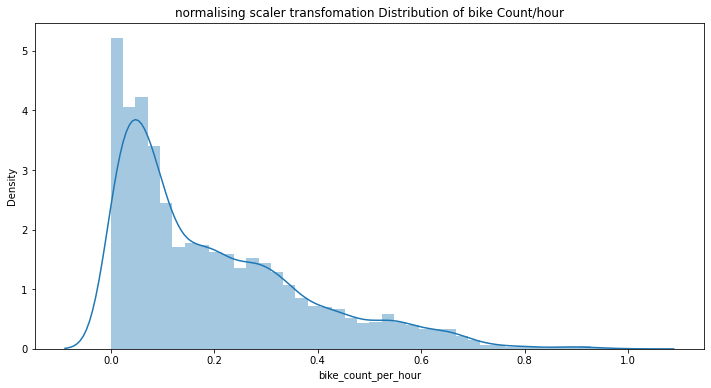

In [647]:
# NORMALISATION

def normalising_fun(series):
  x_min=df[dv].min()
  x_max=df[dv].max()
  x=series
  z=(x-x_min)/(x_max-x_min)
  return z


norm_tf=normalising_fun(df[dv])
print('the skewness after normalised scaler transformation is {}'.format(skew(norm_tf)))

# this means the normalising scaler does not perform skew correction

plt.subplots(figsize=(12,6))
sns.distplot(norm_tf)
plt.title('normalising scaler transfomation Distribution of bike Count/hour')
plt.show()

  

the skewness after sqrt transformation is 0.23732144485836718
________________________________________________________________________________________________________________________________________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


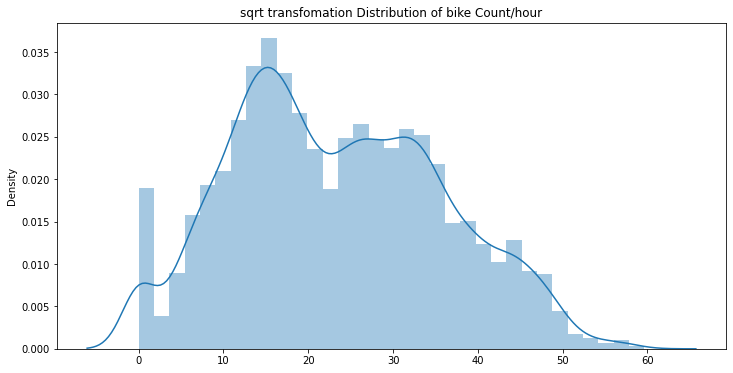

In [648]:
# the final transformation we could perform is sqrt transformation

# skewness after sqrt transformation
sqrt_tf=np.sqrt(df[dv])
print('the skewness after sqrt transformation is {}'.format(skew(sqrt_tf)))

print('__'* 100)

#plotting after transformation
plt.subplots(figsize=(12,6))
sns.distplot(x=sqrt_tf)
plt.title('sqrt transfomation Distribution of bike Count/hour')
plt.show()

Since the distribution has changed now its easier for evaluation so we replace the true values with sqrt transformed values

In [649]:
df.columns

Index(['Date', 'bike_count_per_hour', 'nth_hour', 'Temperature(°C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')

In [650]:
# Finally transformed the values with sqrt values
df['bike_count_per_hour']=np.sqrt(df[dv])

In [651]:
df.describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,0.99])

bike_count_per_hour     nth_hour  ...  Rainfall(mm)  Snowfall (cm)
count          8760.000000  8760.000000  ...   8760.000000    8760.000000
mean             23.443395    11.500000  ...      0.148687       0.075068
std              12.450984     6.922582  ...      1.128193       0.436746
min               0.000000     0.000000  ...      0.000000       0.000000
10%               8.000000     2.000000  ...      0.000000       0.000000
20%              12.401602     4.000000  ...      0.000000       0.000000
30%              15.297059     7.000000  ...      0.000000       0.000000
40%              18.303005     9.000000  ...      0.000000       0.000000
50%              22.461075    11.500000  ...      0.000000       0.000000
60%              26.627054    14.000000  ...      0.000000       0.000000
70%              30.724583    16.000000  ...      0.000000       0.000000
80%              34.641016    19.000000  ...      0.000000       0.000000
90%              40.879090    21.000000  ...      0.000000       0.000000
95%              45.199558    22.000000  ...      0.400000       0.200000
99%              50.261613    23.000000  ...      4.000000       2.500000
max              59.632206    23.000000  ...     35.000000       8.800000

[16 rows x 10 columns]

In [652]:
num_col

['bike_count_per_hour',
 'nth_hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

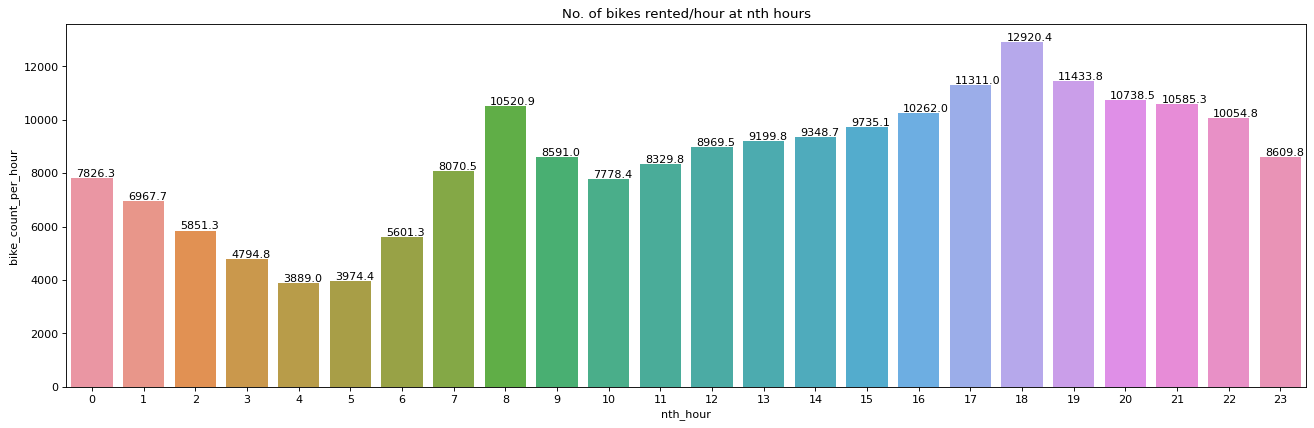

In [653]:
# checking for holiday
gb_function=pd.DataFrame(df.groupby('nth_hour').agg({'bike_count_per_hour':sum}).reset_index())
fig, ax = plt.subplots(figsize=(20,6), dpi= 80)  
sns.barplot(x='nth_hour',y='bike_count_per_hour',data=gb_function)
plt.title('No. of bikes rented/hour at nth hours')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

The maximum rental bikes count are during morning 7  to 10 and evening  5 to 8.
So, during that time the company should ensure the maximum no. of bikes are available.
Addition of some discount to other timing and premium to peak timings could better the situation. 

In [654]:
raw_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


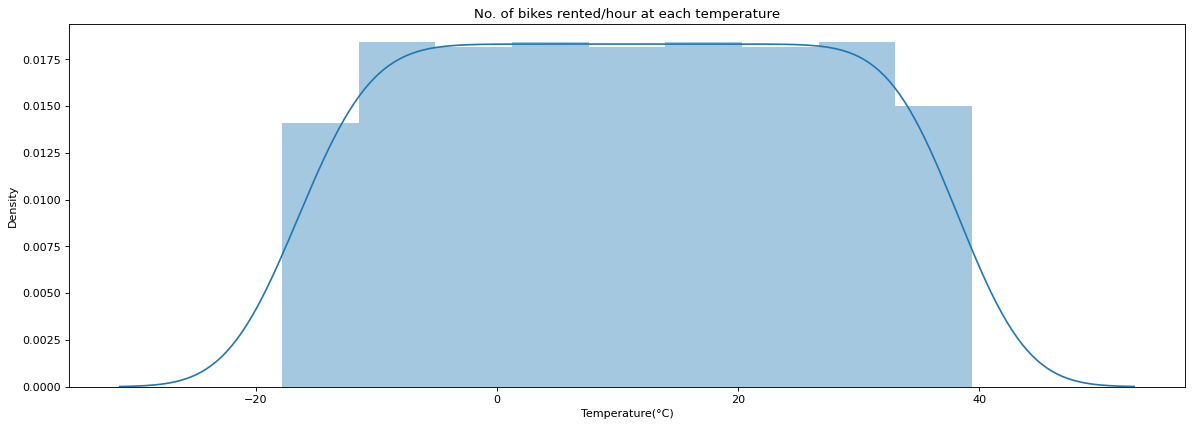

In [655]:
# checking for Temperature
gb_function=pd.DataFrame(raw_df.groupby('Temperature(°C)').agg({'Rented Bike Count':sum}).reset_index())
fig, ax = plt.subplots(figsize=(18,6), dpi= 80)  
sns.distplot(gb_function['Temperature(°C)'])
plt.title('No. of bikes rented/hour at each temperature')
plt.show()


No ingsights can be gathered this graph lets check other variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


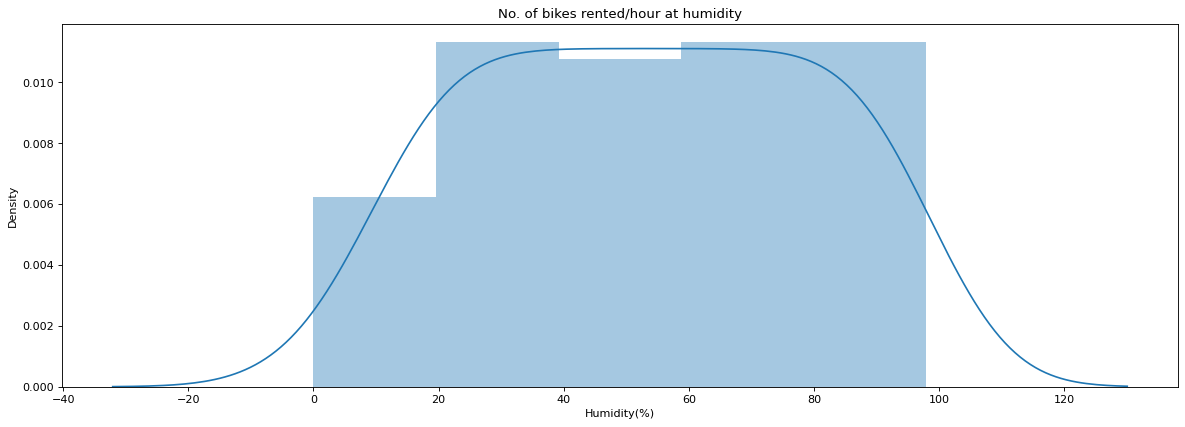

In [656]:
# checking for 'Humidity(%)'
gb_function=pd.DataFrame(raw_df.groupby('Humidity(%)').agg({'Rented Bike Count':sum}).reset_index())
fig, ax = plt.subplots(figsize=(18,6), dpi= 80)  
sns.distplot(gb_function['Humidity(%)'])
plt.title('No. of bikes rented/hour at humidity')
plt.show()

Even the rental counts are higher on higher humidity(>20%). Though it is not a better insight that could be converted into business idea

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


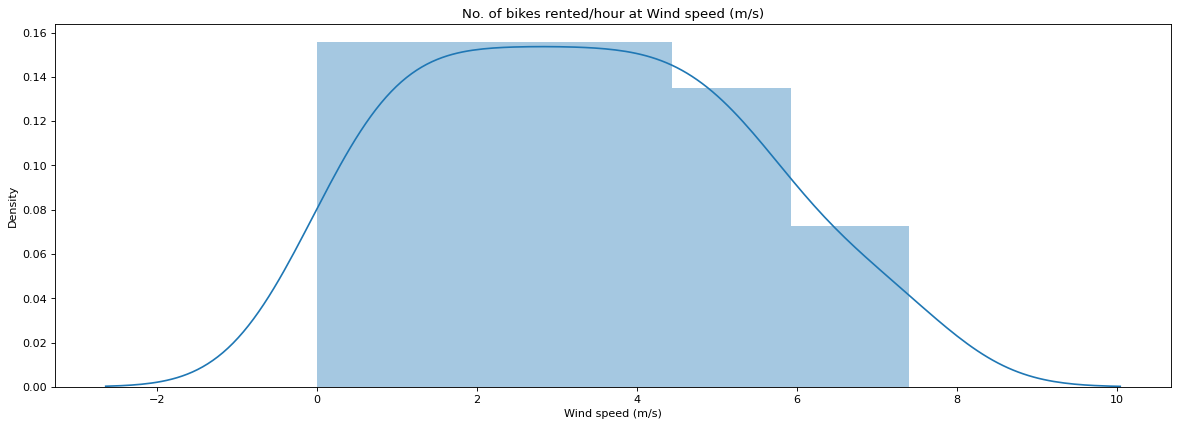

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


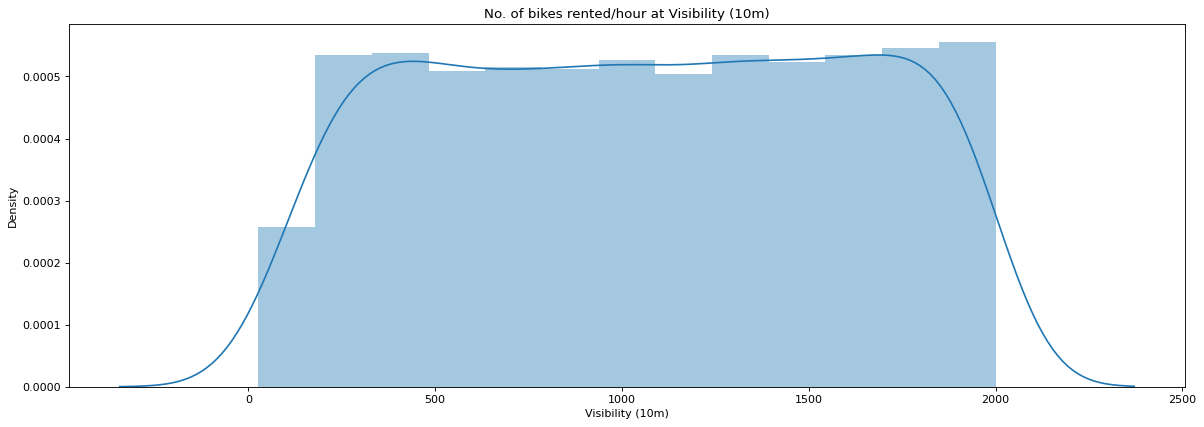

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


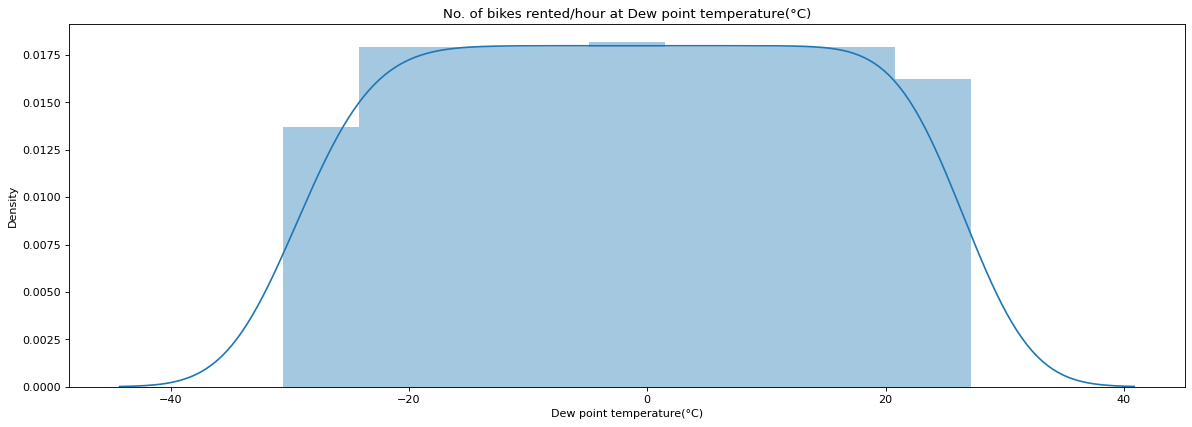

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


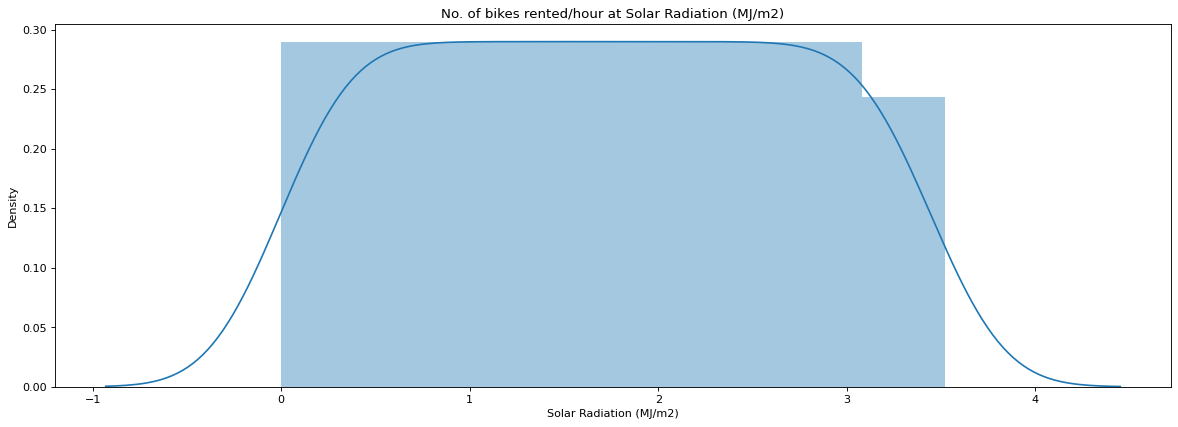

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


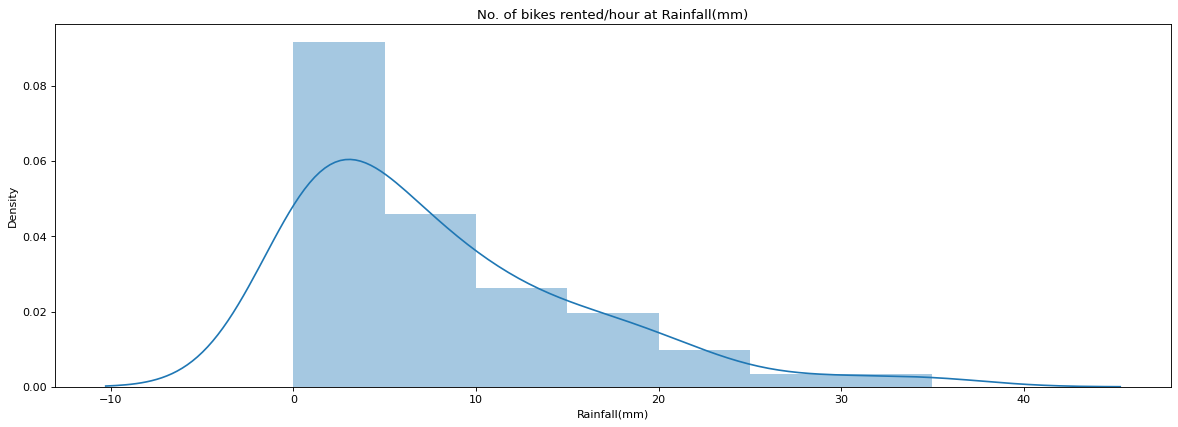

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


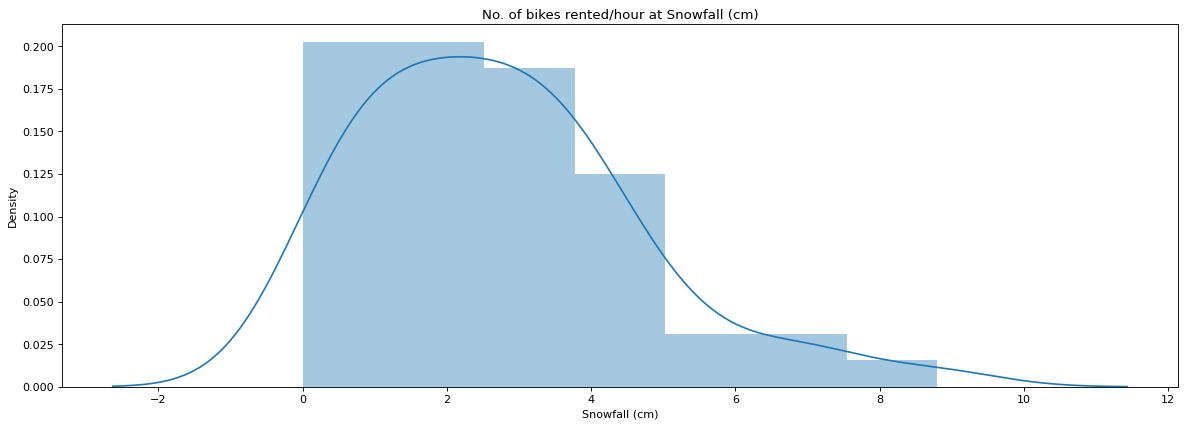

In [657]:
list1=['Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for i in list1:
  gb_function=pd.DataFrame(raw_df.groupby(i).agg({'Rented Bike Count':sum}).reset_index())
  fig, ax = plt.subplots(figsize=(18,6), dpi= 80)  
  sns.distplot(gb_function[i])
  plt.title('No. of bikes rented/hour at {}'.format(str(i)))
  plt.show()


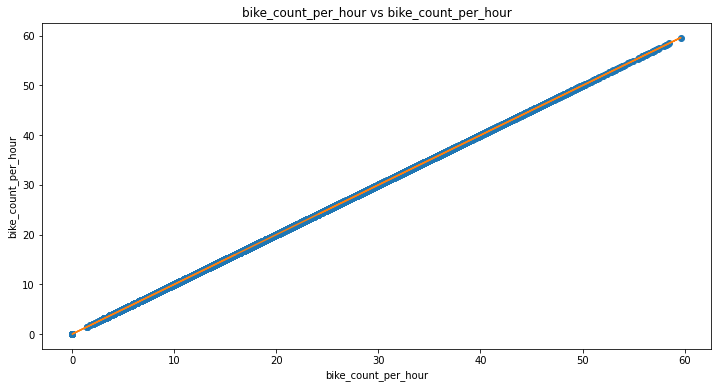

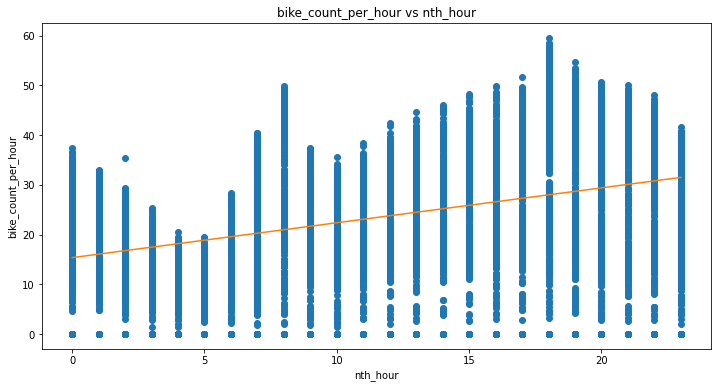

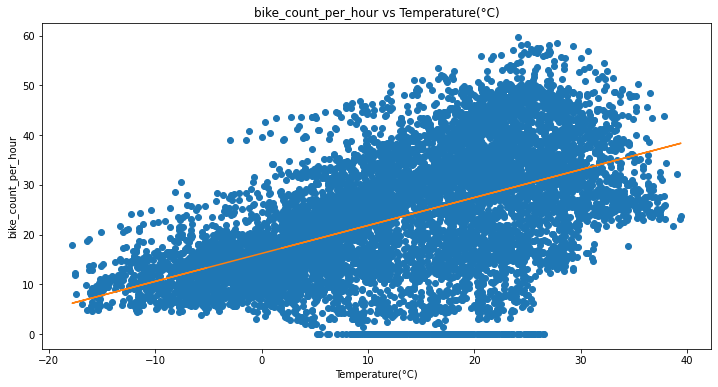

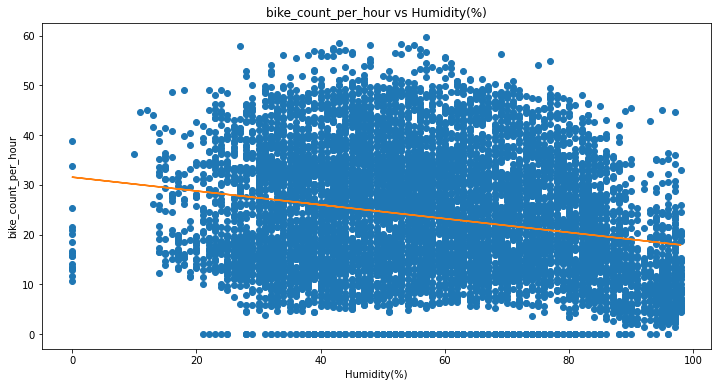

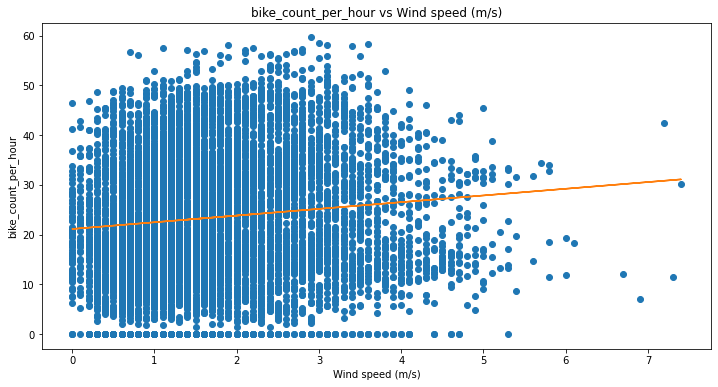

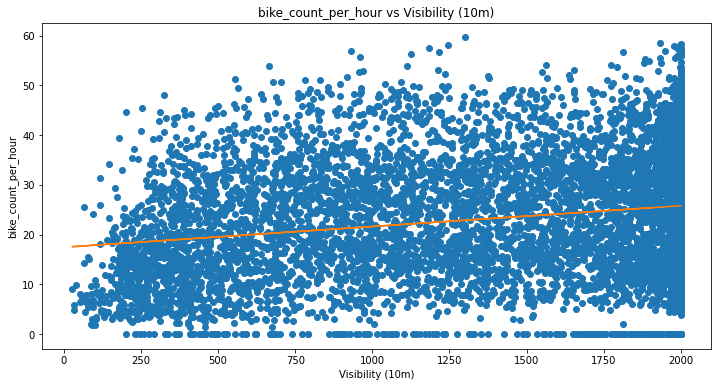

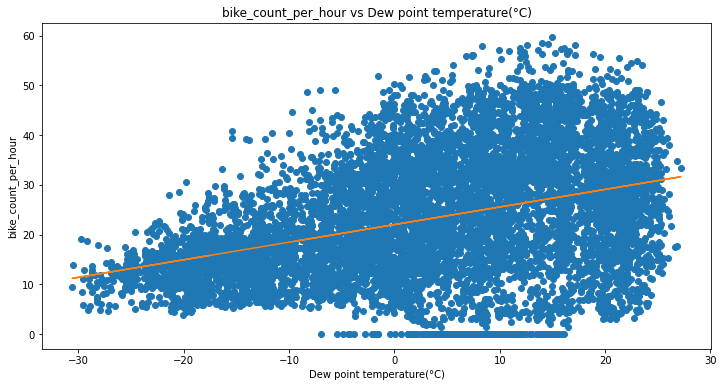

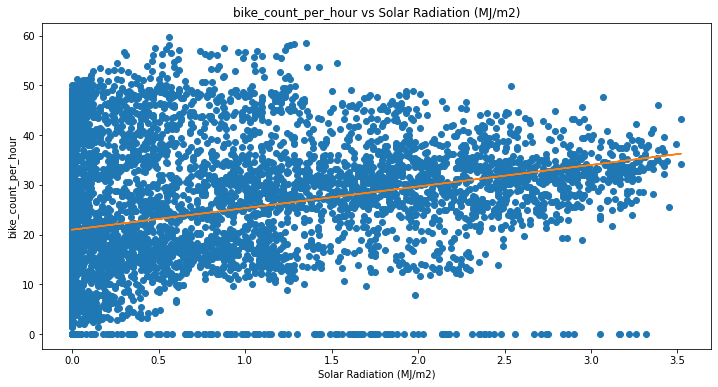

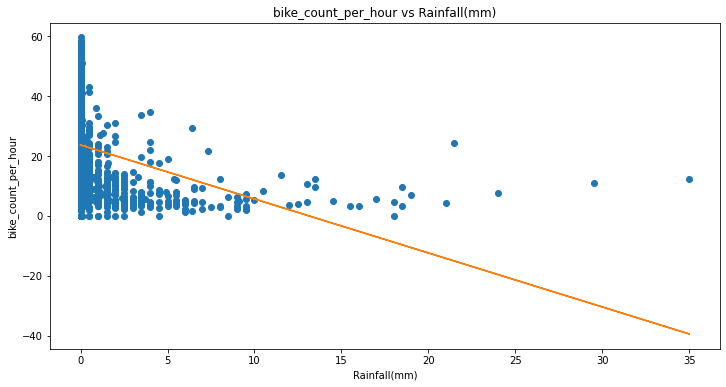

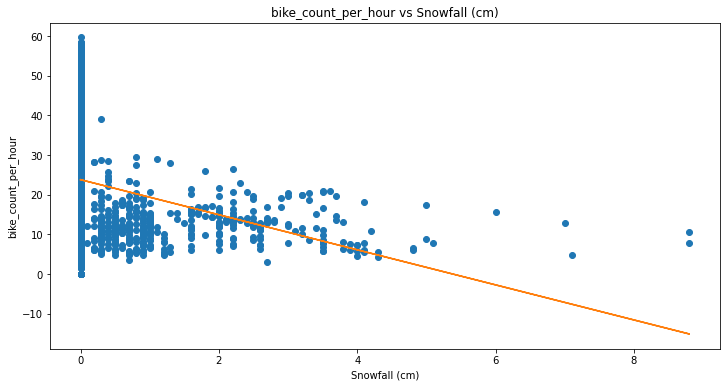

In [658]:
# plotting the scatter plot and regression line with output variable for numerical col
num_col
for columns in num_col:
  plt.figure(figsize=(12,6))
  l=np.array(df[columns])
  m=np.array(df['bike_count_per_hour'])
  plt.plot(l,m,'o')   # plotting scatter
  n, b = np.polyfit(l, m, 1) # generating slope

  plt.plot(l, n*l + b) # plotting the linear line
  plt.xlabel(columns)
  plt.ylabel('bike_count_per_hour')
  plt.title('bike_count_per_hour vs {}'.format(str(columns)))

Summary of displots
1. There is gradual decrease in bike rental count after  wind speed of 4m/s.
2. If my visibility is less than 325 units for 10m then the rental bike decreases
3. No major impact on bike rentals on features of solar radiation,dew point temperature.
4. The rainfall more than 5mm is undesirable for bike rental count as they decrease steeply.
5. Snowfall more than 4 cm is unfavouring the bike rental as the plot decreases steeply.  
6. The more the temperature the more the rental count of bikes

## Bivariate Analysis

<Figure size 432x288 with 0 Axes>

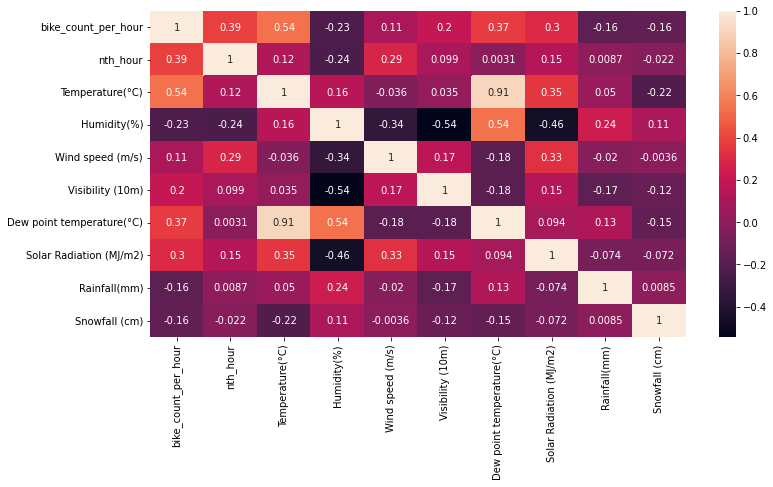

<Figure size 432x288 with 0 Axes>

In [659]:
# Namely how the two variables are related with each other??

corr_df=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_df,annot=True)
plt.figure()

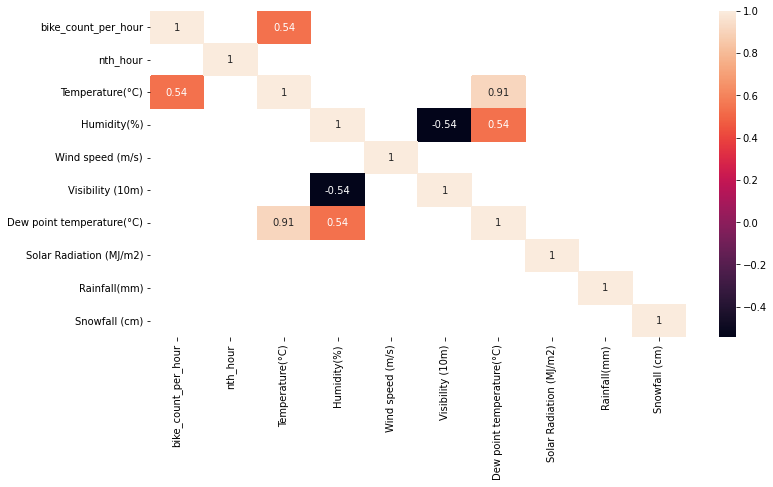

In [660]:
# Strongly correlated variables
plt.figure(figsize=(12,6))
sns.heatmap(corr_df[(corr_df<(-0.5)) | (corr_df>0.5)],annot=True) # considering the strong 
plt.show()

Text(0.5, 1.0, 'Dew point temp vs Temperature')

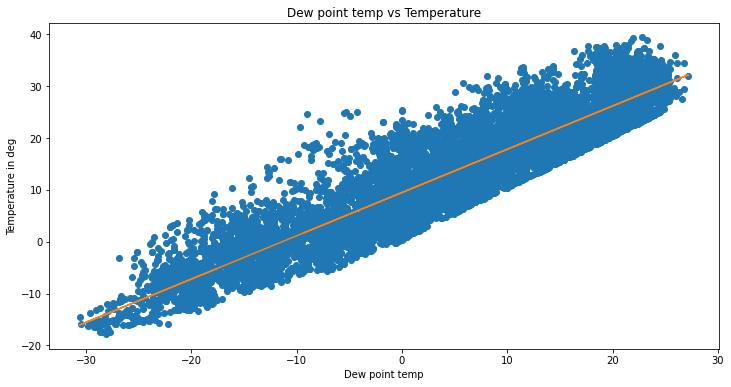

In [661]:
plt.figure(figsize=(12,6))
l=np.array(df['Dew point temperature(°C)'])
m=np.array(df['Temperature(°C)'])
plt.plot(l,m,'o')   # plotting scatter
n, b = np.polyfit(l, m, 1) # generating slope

plt.plot(l, n*l + b) # plotting the linear line
plt.xlabel('Dew point temp')
plt.ylabel('Temperature in deg')
plt.title('Dew point temp vs Temperature')

If the features are very strongly correlateed 
1. they can be clubbed
2. removed
3. derived 

Here, 
Dew point temp - the temperature required to convert the water vapour present in air to water drop by achieving the relative humitdity to 100% at constant pressure.
Thus when temp increases the dew point temp also increases thus temp. is enough to explain the rental bike count.

## Feature Engineering

In [662]:
df=df.reset_index()

In [663]:
df=df[df.columns.drop('index')]


In [664]:
df['Functioning Day']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
8755    Yes
8756    Yes
8757    Yes
8758    Yes
8759    Yes
Name: Functioning Day, Length: 8760, dtype: object

In this feature Engineering 
We process ,select, manipulate and transform the raw data into features that can be used in Supervised Algrorith.
 In order to make machine learning work well on new tasks, it might be necessary to design and train better features.

In [665]:
# To answer question above

# limiting the windspeed outlier
df.loc[df['Wind speed (m/s)']>4.7, 'Wind speed (m/s)'] = 4.7

# changing value of snowfall and rainfall
df.loc[df['Snowfall (cm)']>0, 'Snowfall (cm)'] = 1
df.loc[df['Rainfall(mm)']>0, 'Rainfall(mm)'] = 1

# converting the date columns into months and year
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['week_days'] = pd.DatetimeIndex(df['Date']).weekday

#Dropping the date as they are redundant
df=df.drop(['Date','Dew point temperature(°C)',],axis=1) #As functioning day has only bike count , the column has more rental and count in functioning day

# Before imputing into algorithm lets convert the categorical value into numerical values
df=pd.get_dummies(df,columns=['Seasons','year','Holiday','Functioning Day'])


In [666]:
df.tail()

bike_count_per_hour  nth_hour  ...  Functioning Day_No  Functioning Day_Yes
8755            31.670175        19  ...                   0                    1
8756            27.640550        20  ...                   0                    1
8757            26.343880        21  ...                   0                    1
8758            26.683328        22  ...                   0                    1
8759            24.166092        23  ...                   0                    1

[5 rows x 21 columns]

In [667]:
xgb_df=df.copy()
df.describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,0.99])

bike_count_per_hour  ...  Functioning Day_Yes
count          8760.000000  ...          8760.000000
mean             23.443395  ...             0.966324
std              12.450984  ...             0.180404
min               0.000000  ...             0.000000
10%               8.000000  ...             1.000000
20%              12.401602  ...             1.000000
30%              15.297059  ...             1.000000
40%              18.303005  ...             1.000000
50%              22.461075  ...             1.000000
60%              26.627054  ...             1.000000
70%              30.724583  ...             1.000000
80%              34.641016  ...             1.000000
90%              40.879090  ...             1.000000
95%              45.199558  ...             1.000000
99%              50.261613  ...             1.000000
max              59.632206  ...             1.000000

[16 rows x 21 columns]

In [668]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bike_count_per_hour      8760 non-null   float64
 1   nth_hour                 8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   month                    8760 non-null   int64  
 10  week_days                8760 non-null   int64  
 11  Seasons_Autumn           8760 non-null   uint8  
 12  Seasons_Spring           8760 non-null   uint8  
 13  Seasons_Summer           8760 non-null   uint8  
 14  Seasons_Winter          

## Algorithm Implementation

Algorithm-
A series of instruction given to computer for converting the useful information of world (facts and data) into easily understandable language of computer.
It is just an instruction for a computer to perform the desired action of the user.

Code- is the medium of communication (like english in real world)


### Linear Regression

In [669]:
# importing other libraries
from sklearn.model_selection import train_test_split

Regression - 
"Regression" comes from "regress" which in turn comes from latin "regressus" - to go back (to something). In that sense, regression is the technique that allows "to go back" from messy, hard to interpret data, to a clearer and more meaningful model.

Its  a predictive modelling technique which sets the relation between the dependent and independent variables.

Linear- it follows the linear equation to perform the regression and decides the weightage of each parameter to predict.

**Assumption of linear regression**
1. There is no multicollinearity (interdependencies among variables)
2. The values are homosedacity in nature (uniform variance)
3. the dv and idv are linearly dependent
4. Mean of residual must be zero.

**Difference between residue and error**
1. Error - difference between actual and predicted values
2. residue- difference between predicted value and mean(best fit line)

**Evaluation metrics in linear regression**
r2_score and adjusted_r2_score

r2_score means(coef of determination):
r2_score=summation(distance between mean and predicted value)^2/summation(distance between mean and actual value)^2

low r2_score means the actuals data points are far away from the best fit line.
High r2_score means the actual data points are nearer to best fit line.

**Process of linear regression(A distance based algorithm)**
Generally the linear equation y=mx+c where m and c are found using the values of x and y. After that a line is drawn. here the algorithm changes the values of m such that the error between predicted and actual values is low(thats why called regression).
Best fit line; A line that has the minimum error of all lines iterated and the error is the difference between actual and predicted values


out put of linear regression is the value of dependent variable

**Evaluation metrics in logistic regression**
Accuracy,precision,recall,auc-roc, confusion matrix, f1 score

Output of logistic regression is predicted outcome of an event. 
thats why they call for accuracy,precison etc.


Pros of linear algo.
1. Easy to run (complexity is minimum) and understandable.
2. Usually it is underfitted as real time application are bit complex in nature.
3. This gives values of prediction of data that is not even present in the given data set.
4. It gives strength of relationship between variables.
5. It can forecast values of how much we want
6. This gives trend of forecasting

Cons of linear algo.
1. Model is too simple to handle real time problems
2. Cannot use for large dataset
3. Parametric in nature (They work under only these assumptions)
4. It is affected by outliers, missing values etc.

Application
1. Used in sales forecasting, finance forecasting, weather forecasting.
2. Assesment of risk in financial sector 

My Understanding:
Linear regression are sensitive this does not mean they are not useful as they are very sensitive the trend capturing and new changes are easily detected. 

In [670]:
df.columns

Index(['bike_count_per_hour', 'nth_hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'month', 'week_days', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'year_2017',
       'year_2018', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning Day_No', 'Functioning Day_Yes'],
      dtype='object')

In [671]:
# let us assign the x and y for train test split

X_col_list=df.columns.drop('bike_count_per_hour')
y_col_list=['bike_count_per_hour']
X=df[X_col_list]  # we are imputing the first 90% data as remaining 10% is unknown to check our predictability.
y=df[y_col_list]

# before splitting, since the linear regression are affected by outliear we standardscale it first
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # assigning variable

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [672]:
X

array([[0.        , 0.22027972, 0.37755102, ..., 1.        , 0.        ,
        1.        ],
       [0.04347826, 0.21503497, 0.3877551 , ..., 1.        , 0.        ,
        1.        ],
       [0.08695652, 0.20629371, 0.39795918, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.91304348, 0.35664336, 0.39795918, ..., 1.        , 0.        ,
        1.        ],
       [0.95652174, 0.3479021 , 0.41836735, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.34440559, 0.43877551, ..., 1.        , 0.        ,
        1.        ]])

In [673]:
# since the scaling is done now we split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [674]:
# Importing library for Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression(n_jobs=-1).fit(X_train,y_train)

In [675]:
# the values of a0
reg.intercept_

array([-0.04363477])

In [676]:
reg.get_params(dict)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': 'deprecated',
 'positive': False}

In [677]:
# the feature importances 
reg.coef_
lin_reg=pd.DataFrame(reg.coef_,columns=df.columns.drop('bike_count_per_hour'))
lin_reg.rename(index={0:'Weightage1'})

nth_hour  Temperature(°C)  ...  Functioning Day_No  Functioning Day_Yes
Weightage1  0.192088         0.456963  ...           -0.240071             0.240071

[1 rows x 20 columns]

In [678]:
# predict the test values using the fitted linear regression
y_test_pred=reg.predict(X_test)
y_train_pred=reg.predict(X_train)

metric=pd.DataFrame()

In [679]:
# Now lets us try out the efficiency of our prediction

# Hey ! wait before that lets import the lib required
from sklearn.metrics import mean_squared_error

# Let measure em!
mse_test  = mean_squared_error((y_test),(y_test_pred))
print('MSE:',mse_test)
print('__'*100)

rmse_test=np.sqrt(mse_test)
print('RMSE:',rmse_test)
print('__'*100)


mse_train=mean_squared_error((y_train),(y_train_pred))
print('mse_train:',mse_train)
print('__'*100)
rmse_train=np.sqrt(mse_train)
print('rmse_test:',rmse_train)
print('__'*100)

reg_score_train=reg.score(X_train,y_train)
reg_score_test=reg.score(X_test,y_test)

# why not score

lr_dict={'Model':'Linear Regression','r2_score_train_':reg_score_train,'r2_score_test_':reg_score_test,'rmse_train':rmse_train,'rmse_test':rmse_test,'tweak':'No hyperparmater tuning'}
metric=metric.append(lr_dict,ignore_index=True)

print('the r2_score(accuracy of model) is {}'.format(reg.score(X_train,y_train)))

MSE: 0.014109643319878969
________________________________________________________________________________________________________________________________________________________________________________________________________
RMSE: 0.11878401963176262
________________________________________________________________________________________________________________________________________________________________________________________________________
mse_train: 0.01363868557561253
________________________________________________________________________________________________________________________________________________________________________________________________________
rmse_test: 0.11678478315094193
________________________________________________________________________________________________________________________________________________________________________________________________________
the r2_score(accuracy of model) is 0.6857501158989769


In [680]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test),(y_test_pred))
print("R2 % :" ,r2*100)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 % : 68.14078095147076
Adjusted R2 :  0.6777267905605159


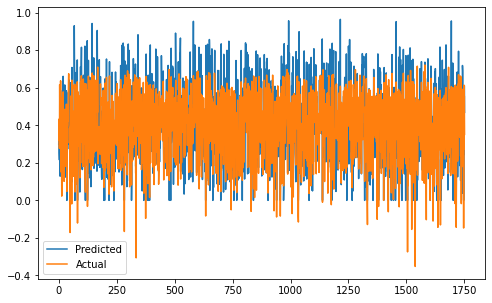

In [681]:
plt.figure(figsize=(8,5))
plt.plot((y_test))
plt.plot(np.array((y_test_pred)))
plt.legend(["Predicted","Actual"])
plt.show()

In [682]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_test, y_test)

Lasso(alpha=0.0001, max_iter=3000)

In [683]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [684]:
print('The lasso score for train dataset {}'.format(lasso.score(X_train, y_train)))
print('The lasso score for test dataset {}'.format(lasso.score(X_test, y_test)))

The lasso score for train dataset 0.685635113127951
The lasso score for test dataset 0.6812064516490908


In [685]:
# let us try linear algroithm with new try
reg=LinearRegression(normalize=True,n_jobs=-1)
reg.fit(X_train,y_train)
print('__'*100)

# checking weightage
lin_reg=pd.DataFrame(reg.coef_,columns=df.columns.drop('bike_count_per_hour'))
lin_reg=lin_reg.rename(index={0:'Weightage'})
lin_reg=lin_reg.T.reset_index()
print('__'*100)

# Let measure em!
mse_test  = mean_squared_error((y_test),(y_test_pred))
print('MSE:',mse_test)
print('__'*100)

rmse_test=np.sqrt(mse_test)
print('RMSE:',rmse_test)
print('__'*100)

# why not score

print('The r2_score(accuracy of model) is {}'.format(reg.score(X_train,y_train)))
print('__'*100)

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
MSE: 0.014109643319878969
________________________________________________________________________________________________________________________________________________________________________________________________________
RMSE: 0.11878401963176262
________________________________________________________________________________________________________________________________________________________________________________________________________
The r2_score(accuracy of model) is 0.6857501158989769
__________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [686]:
lin_reg.sort_values('Weightage',ascending=False)

index  Weightage
1           Temperature(°C)   0.456963
19      Functioning Day_Yes   0.240071
0                  nth_hour   0.192088
10           Seasons_Autumn   0.059025
17       Holiday_No Holiday   0.022933
3          Wind speed (m/s)   0.021176
14                year_2017   0.018711
11           Seasons_Spring   0.015399
7             Snowfall (cm)   0.012190
12           Seasons_Summer   0.012156
4          Visibility (10m)   0.005069
8                     month  -0.000452
9                 week_days  -0.015348
15                year_2018  -0.018711
16          Holiday_Holiday  -0.022933
5   Solar Radiation (MJ/m2)  -0.046031
13           Seasons_Winter  -0.087910
2               Humidity(%)  -0.195862
6              Rainfall(mm)  -0.214287
18       Functioning Day_No  -0.240071

## Tree Based Algorithms

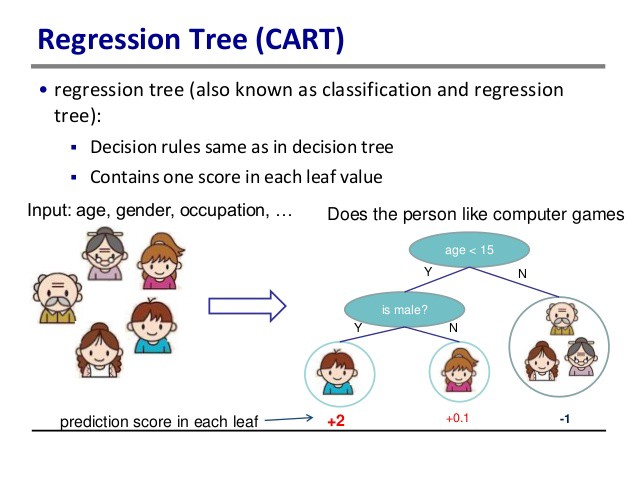

An algorithm which classifies the data into different packs based on the information gain(the difference between values) that is run around every features.

In regressor, the algorithm distinguishes by the maximum of Mean_squared_error or mae etc. 

**Properties of Decision tree:** 
1. It is non parametric (fully maths based as it used MSE and MAE for branching)
2. Greedy in nature thus overfitting if we dont mention the depth of tree(expands the tree untill each node has one sample)
3. It prediction values always lie in the range of values in dataset.(the predicted values is neither greater than max.value of data or min.values of data)
4. It is an supervised algorithm.

# components of Decision tree:
1. Root node - the start of decision tree.
2. Decision node - based on max information gain is splitted into leaves with samples. Depth of decision is the levels that it grows to fit ,unless you mention they keep growing and becomes a overfit 
3. leaf node- node of min samples during the branching.
4. terminal node- deepest node present on tree and end point

Pruning- since in regression the split happens due to hetrogenity, the more homogenous are also used to perform splitting. On pruning the non required branch of tree is removed

**Application of Decision tree**
1. Business managmenet
2. Fraudulent detection
3. Energy consumption
4. Health care management

Pros of DT: 
1. low time consumption and fast
2. Non affected by outliers and missing values
3. No need of normalisation or standardisation
4. Highly intrepretable and explainable
5. Preprocessing and feature selection are NOT required
6.

Cons of DT:
1. For larger dataset it is time consuming
2. Overfitting of data
3. Greedy in nature.
4. More complex model than linear regression and performs poor in forecasting.
5. small change  in data could affect the tree and impact the results thus causing instability in the process.


Decision tree parameters:
1. **criterion**: MSE, MAE it is a parameter which helps to split the node.In this a regressor is a distance based thus the error is taken to split the node.
2. **splitter**- a plan to split the node.It may be a best split or random best split.
3. **max_depth** - It is the depth of tree at which it grows. It can be called level also when depth increases it overfits the data. While it is low it underfits the data.
4. **min_samples_split** : min. No. of samples required to split the node.
for eg. Min sample 4 means if a node has >=4 then it can be splitted.
5. **min_samples_leaf** : A leaf node and terminal node are same they cannot be splitted futher. eg.min_samples_leaf=4 means, if the node has <=4 samples then it cannot be splitted, it becomes the leaf node
6. **min_impurity_decrease**- split happens to reduce the impurity. To quantify this impurity  - this feature is given. Min amount impurity decrease required to make the split happen.

In [687]:
# as the name suggests the tree branches based on the information gain(Selection of value that gives highly biased branch)

#Lets start with the decision Tree
from sklearn.tree import DecisionTreeRegressor # Regression problem (output is continuous)

from sklearn.metrics import r2_score # since its a regressor with distance based classification

#Algorithm model
dt=DecisionTreeRegressor(max_depth=10,random_state=0, max_leaf_nodes=10)

#Imputing the values to the built model
dt.fit(X_train,y_train)  #scaled X and y Train

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10, random_state=0)

In [688]:
X_train

array([[0.65217391, 0.45454545, 0.63265306, ..., 1.        , 0.        ,
        1.        ],
       [0.7826087 , 0.80769231, 0.58163265, ..., 1.        , 0.        ,
        1.        ],
       [0.47826087, 0.83391608, 0.58163265, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.47826087, 0.75699301, 0.58163265, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.45629371, 0.60204082, ..., 1.        , 0.        ,
        1.        ],
       [0.86956522, 0.43531469, 0.84693878, ..., 1.        , 0.        ,
        1.        ]])

In [689]:
y_train

array([[0.29620775],
       [0.89304273],
       [0.44715071],
       ...,
       [0.54751715],
       [0.33580821],
       [0.37981998]])

In [690]:
#creating a df for storing the info for analysis
dt_df=pd.DataFrame()

In [691]:
# since we imputed the model with info (trained the model), let try out -how it predicts
y_test_pred=dt.predict(X_test)
y_test_pred


array([0.21247527, 0.37786029, 0.26924311, ..., 0.21247527, 0.4893431 ,
       0.21247527])

In [692]:
# predict using X train
y_train_pred=dt.predict(X_train)
y_train_pred

array([0.26924311, 0.69623845, 0.53767347, ..., 0.53767347, 0.21247527,
       0.4893431 ])

In [693]:
# since working in decision tree, lets us try the accuracy of its model

print('The r2 score for train dataset {}'.format(r2_score(y_train, y_train_pred)))
print('The r2 score for test dataset {}'.format(r2_score(y_test, y_test_pred)))

r2_score_train=r2_score(y_train, y_train_pred)
r2_score_test=r2_score(y_test, y_test_pred)

rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))

dict1={'Model':'Decision Tree','r2_score_train_':r2_score_train,'r2_score_test_':r2_score_test,'rmse_train':rmse_train,'rmse_test':rmse_test,'tweak':'No hyperparmater tuning'}
metric=metric.append(dict1,ignore_index=True)
metric

The r2 score for train dataset 0.7229119580453318
The r2 score for test dataset 0.7157591179923305


Model  r2_score_test_  ...  rmse_train                    tweak
0  Linear Regression        0.681408  ...    0.116785  No hyperparmater tuning
1      Decision Tree        0.715759  ...    0.109662  No hyperparmater tuning

[2 rows x 6 columns]

In [694]:
metric

Model  r2_score_test_  ...  rmse_train                    tweak
0  Linear Regression        0.681408  ...    0.116785  No hyperparmater tuning
1      Decision Tree        0.715759  ...    0.109662  No hyperparmater tuning

[2 rows x 6 columns]

In [695]:
# importing necessary library
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

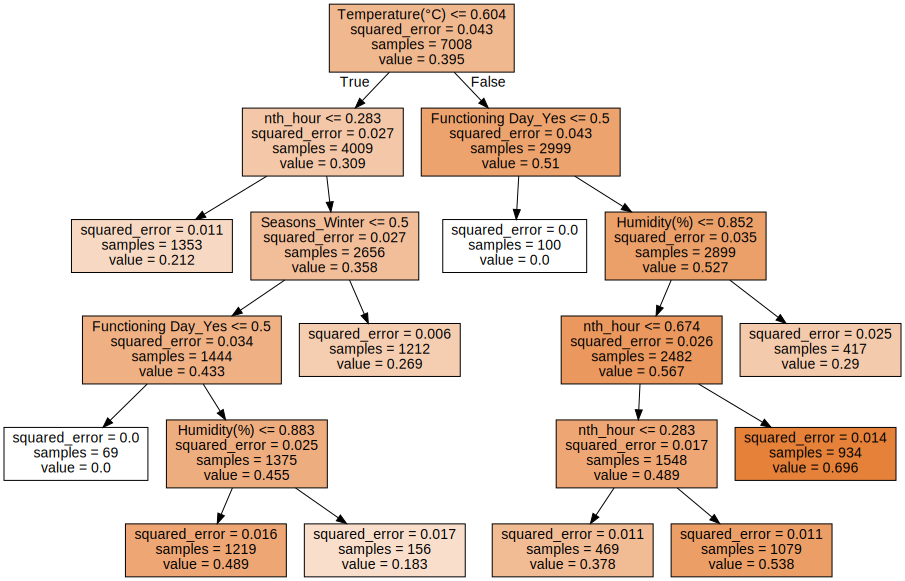

In [696]:
graph = Source(tree.export_graphviz(dt, out_file=None,feature_names=df.drop('bike_count_per_hour',axis=1).columns, filled = True))
display(SVG(graph.pipe(format='svg')))

In [697]:
df_test_real_vs_act = pd.DataFrame({'Real test Values':y_test.reshape(-1), 
                                    'Predicted test Values':y_test_pred.reshape(-1)})
df_train_real_vs_act = pd.DataFrame({'Real train Values':y_train.reshape(-1), 'Predicted train Values':y_train_pred.reshape(-1)})
df_test_real_vs_act['Real train Values']=df_train_real_vs_act['Real train Values']
df_test_real_vs_act['Predicted train Values']=df_train_real_vs_act['Predicted train Values']
df_test_real_vs_act['prediction error in test']=(df_test_real_vs_act['Real test Values']-df_test_real_vs_act['Predicted test Values']/df_test_real_vs_act['Real test Values'])*100
df_test_real_vs_act['prediction error in train']=(df_test_real_vs_act['Real train Values']-df_test_real_vs_act['Predicted train Values']/df_test_real_vs_act['Real train Values'])*100
df_test_real_vs_act

Real test Values  ...  prediction error in train
0             0.299981  ...                 -61.275937
1             0.403862  ...                  11.341771
2             0.252100  ...                 -75.529281
3             0.215408  ...                 -60.020451
4             0.426222  ...                  -7.736688
...                ...  ...                        ...
1747          0.000000  ...                 -48.922653
1748          0.392205  ...                 -18.281183
1749          0.244742  ...                -161.230722
1750          0.611798  ...                 -45.563949
1751          0.469245  ...                 -65.092891

[1752 rows x 6 columns]

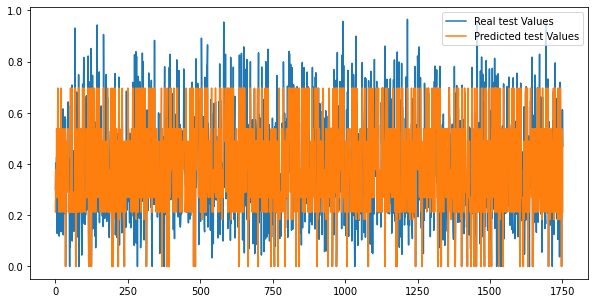

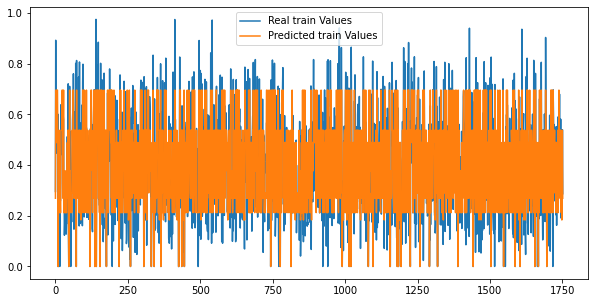

In [698]:
plt.figure(figsize=(10,5))
plt.plot(df_test_real_vs_act['Real test Values'],label='Real test Values')
plt.plot(df_test_real_vs_act['Predicted test Values'],label='Predicted test Values')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(df_test_real_vs_act['Real train Values'],label='Real train Values')
plt.plot(df_test_real_vs_act['Predicted train Values'],label='Predicted train Values')
plt.legend()
plt.show()


## Ensemblence of Decision Tree regressor

Ensemble - 
Meaning clubbing together and viewing as one.

The same applies in this too...
In Ensemble instead of single decision tree, a group of decision tree are processed(parllely or sequential) and average of those(group of dt) output is represented ensemble output.

The methods of ensemble involves :
1. Bagging (Bootstap aggregations)
2. Boosting (processing trees sequentials and learning from previous tree)
3. Stacking (though models are processed parallely they are sequenced (like stacking of book in shelves) based on the weightage. The weightage is determined by the performance. Higher performance - higher weightage)

General Ensemble Algorithm:
1. RandomForest
2. Ada boost(traditional)
3. light GBM
4. catboost
5. XGboost (parallel processing thus fast and efficient)

Pros of RF:
1. the rf does not overfit with many features
2. Accuracy and efficiency is high
3. It can be saved on reused

Cons of RF:
1. It a bit complex in nature and explaianability is less as they take randomdataset.
2. It is accurate in cost of computation power and complexity
3. A bit time consuming in nature.


### Grid search CV
1. estimator - an interface that learns sklearn and produces result eg.DT
2. param_grid - parameter grids in which we input parameters like, n_estimator,max_depth,min_sample_leaf,min_sample_split etc.that are given by the parameters of estimator.
3. Scoring - gives the score of the grid search
4. n_jobs- used for running parllely by using all processors
5. refit - it fits the best estimator out the grid searches
6. cv- cross validation - it splits the data into sub data and runs a stratified approach to subdata and evaluates. Here even the train data is splitted and evaluated against their own data.
7. verbose - input as integer , higher the integer more information about the searches is given.

Attributes
1. best_estimator_- this gives the best estimator among the grid searches conducted
2. best_score_ - cross validated score of best_estimator_
3. best_params_- best parameters that gives the best result 

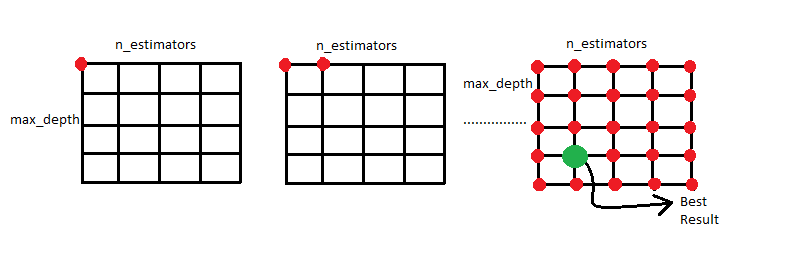

About model features:
1.criterion:

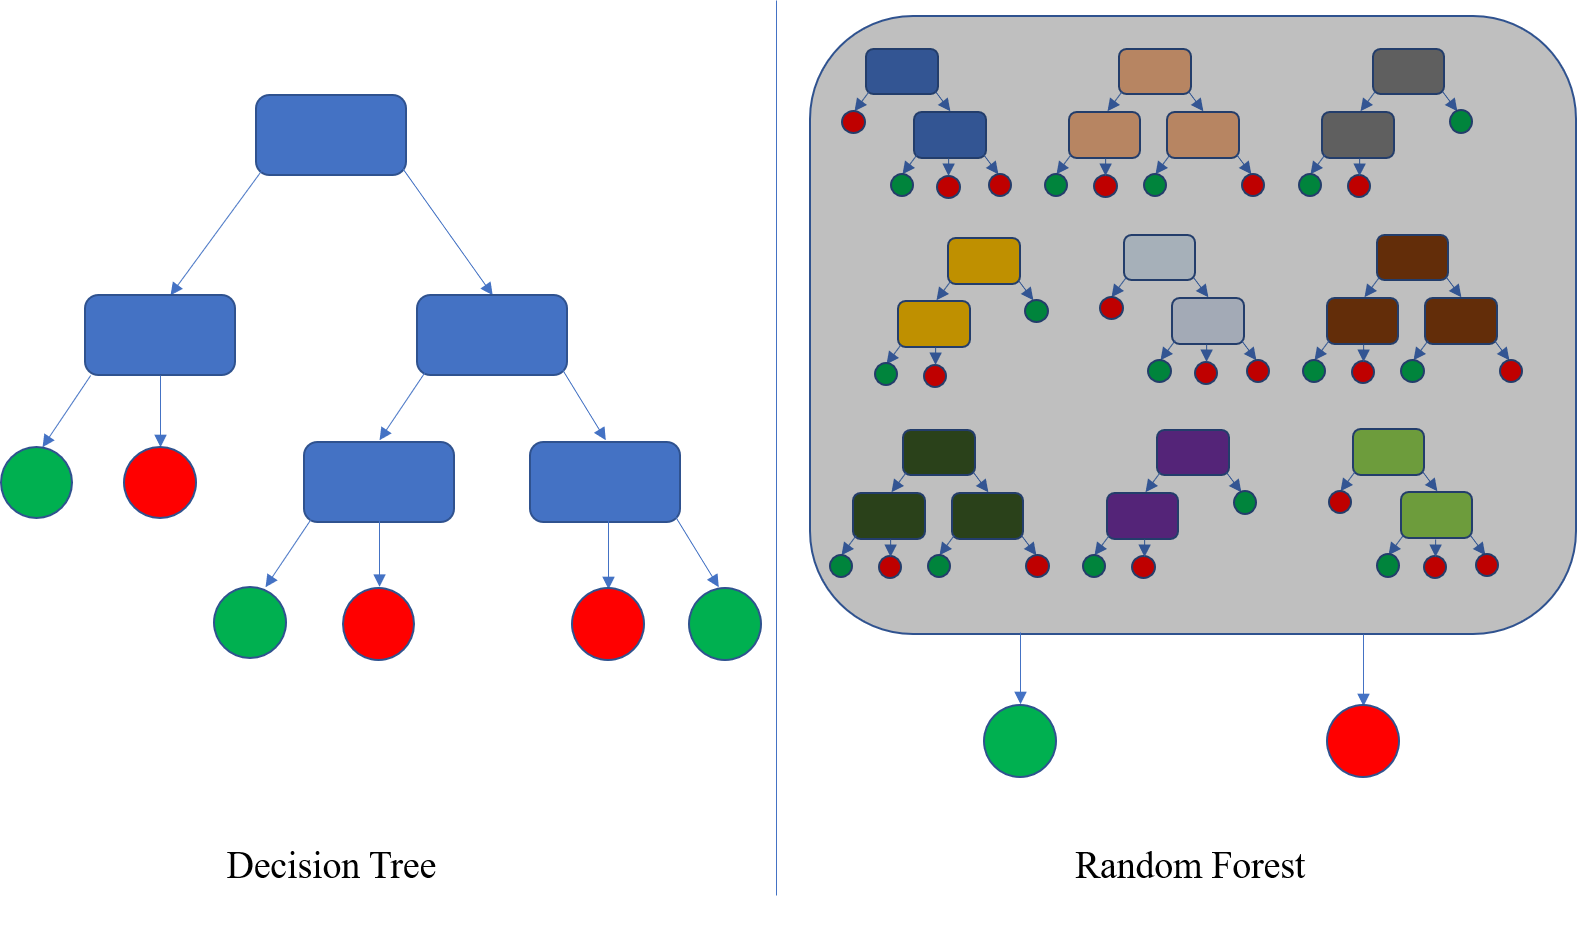

grid_values={'n_estimators': [20,30,40],'max_depth':[8,9,10]}
regressor=GridSearchCV(regressor,grid_values,scoring='neg_mean_squared_error',cv=5)

In [699]:
# importing the library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#creating a model using RFG
regressor=RandomForestRegressor()


#training the model with X_train and y_train.
regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestRegressor()

In [700]:
# reference random forest

regressor=RandomForestRegressor()
grid_value={'n_estimators':[35,70,100],'max_depth':[3,6,9],'min_samples_split':[20,40,60],'min_samples_leaf':[20,40,60]}
regressor=GridSearchCV(regressor,param_grid=grid_value,scoring='r2',cv=5,verbose=2)

#Fitting the data
regressor.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=40, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=70; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=20, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=70; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=40, min_samples_split=60, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=20, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=40, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=35; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=70; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=60, n_estimators=100; total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9],
                         'min_samples_leaf': [20, 40, 60],
                         'min_samples_split': [20, 40, 60],
                         'n_estimators': [35, 70, 100]},
             scoring='r2', verbose=2)

In [701]:
# predict using the regressor model created:
y_train_pred_rf=regressor.predict(X_train)
y_test_pred_rf=regressor.predict(X_test)

In [702]:
# let see the best parameters
regressor.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_leaf=20, min_samples_split=40,
                      n_estimators=70)

In [703]:
#best 
regressor.best_score_

0.8704287126673188

In [704]:
# since working in decision tree, lets us try the accuracy of its model

print('The r2 score of RF for train dataset {}'.format(r2_score(y_train, y_train_pred_rf)))
print('The r2 score of RF for test dataset {}'.format(r2_score(y_test, y_test_pred_rf)))

reg_score_train=r2_score(y_train, y_train_pred_rf)
reg_score_test=r2_score(y_test, y_test_pred_rf)

rmse_train= np.sqrt(mean_squared_error(y_train,y_train_pred_rf))
rmse_test= np.sqrt(mean_squared_error(y_test,y_test_pred_rf))

# imputing the tree on model
rf_dict={'Model':'Random Forest-1','r2_score_train_':reg_score_train,'r2_score_test_':reg_score_test,'rmse_train':rmse_train,'rmse_test':rmse_test,'tweak':'No hyperparmater tuning'}
metric=metric.append(rf_dict,ignore_index=True)
metric

The r2 score of RF for train dataset 0.8936352626926218
The r2 score of RF for test dataset 0.8733759270155758


Model  r2_score_test_  ...  rmse_train                    tweak
0  Linear Regression        0.681408  ...    0.116785  No hyperparmater tuning
1      Decision Tree        0.715759  ...    0.109662  No hyperparmater tuning
2    Random Forest-1        0.873376  ...    0.067943  No hyperparmater tuning

[3 rows x 6 columns]

In [705]:
# reference random forest

regressor=RandomForestRegressor()
grid_value={'n_estimators':[10,20,35],'max_depth':[9,10,11],'min_samples_split':[5,10,20],'min_samples_leaf':[5,10,20]}
regressor=GridSearchCV(regressor,param_grid=grid_value,scoring='r2',cv=5,verbose=2)

#Fitting the data
regressor.fit(X_train,y_train)

# predict using the regressor model created:
y_train_pred_rf=regressor.predict(X_train)
y_test_pred_rf=regressor.predict(X_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.5s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.5s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.5s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.1s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=35; total time=   0.6s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=10, n_estimators=35; total time=   0.6s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=5, min_samples_split=20, n_estimators=35; total time=   0.6s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=5, n_estimators=35; total time=   0.6s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=10, n_estimators=35; total time=   0.6s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=35; total time=   0.6s
[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=5, n_estimators=35; total time=   0.5s
[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=10, n_estimators=35; total time=   0.5s
[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.2s
[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=20, n_estimators=35; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [706]:

regressor=RandomForestRegressor()
grid_value={'n_estimators':[39],'max_depth':[10],'min_samples_split':[10],'min_samples_leaf':[7]}
regressor=GridSearchCV(regressor,param_grid=grid_value,scoring='r2',cv=6,verbose=2)

#Fitting the data
regressor.fit(X_train,y_train)

# predict using the regressor model created:
y_train_pred_rf=regressor.predict(X_train)
y_test_pred_rf=regressor.predict(X_test)

Fitting 6 folds for each of 1 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=39; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=39; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=39; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=39; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=39; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=39; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [707]:
# let see the best parameters
regressor.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=7, min_samples_split=10,
                      n_estimators=39)

In [708]:
#best 
regressor.best_score_

0.8898299320982187

In [709]:
# since working in decision tree, lets us try the accuracy of its model

print('The r2 score of RF for train dataset {}'.format(r2_score(y_train, y_train_pred_rf)))
print('The r2 score of RF for test dataset {}'.format(r2_score(y_test, y_test_pred_rf)))

reg_score_train=r2_score(y_train, y_train_pred_rf)
reg_score_test=r2_score(y_test, y_test_pred_rf)

rmse_train= np.sqrt(mean_squared_error(y_train,y_train_pred_rf))
rmse_test= np.sqrt(mean_squared_error(y_test,y_test_pred_rf))

The r2 score of RF for train dataset 0.9223893397282145
The r2 score of RF for test dataset 0.8945318645991112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/loc

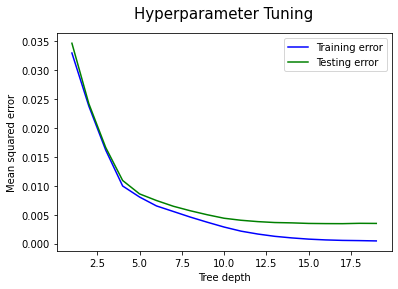

<Figure size 432x288 with 0 Axes>

In [710]:
from sklearn.metrics import mean_squared_error as mse

# for hyper parameter tuning

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = RandomForestRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = RandomForestRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

sns.lineplot(max_depths, training_error, color='blue', label='Training error')
sns.lineplot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.figure()
plt.show()

In [711]:
# random forest -2 

#creating a model using RFG
regressor=RandomForestRegressor(max_depth=6,n_jobs=-1,random_state=42) # from above diagram lets assume 6 level


#training the model with X_train and y_train.
regressor.fit(X_train,y_train)

# predict using the regressor model created:
y_train_pred_rf=regressor.predict(X_train)
y_test_pred_rf=regressor.predict(X_test)

# since working in decision tree, lets us try the accuracy of its model

print('The r2 score of RF2 for train dataset {}'.format(r2_score(y_train, y_train_pred_rf)))
print('The r2 score of RF2 for test dataset {}'.format(r2_score(y_test, y_test_pred_rf)))

reg_score_train=r2_score(y_train, y_train_pred_rf)
reg_score_test=r2_score(y_test, y_test_pred_rf)

rmse_train= np.sqrt(mean_squared_error(y_train,y_train_pred_rf))
rmse_test= np.sqrt(mean_squared_error(y_test,y_test_pred_rf))

# imputing the tree on model
rf_dict={'Model':'Random Forest-2','r2_score_train_':reg_score_train,'r2_score_test_':reg_score_test,'rmse_train':rmse_train,'rmse_test':rmse_test,'tweak':'max_depth-6'}
metric=metric.append(rf_dict,ignore_index=True)
metric

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


The r2 score of RF2 for train dataset 0.8495679457745041
The r2 score of RF2 for test dataset 0.8332110777881288


Model  r2_score_test_  ...  rmse_train                    tweak
0  Linear Regression        0.681408  ...    0.116785  No hyperparmater tuning
1      Decision Tree        0.715759  ...    0.109662  No hyperparmater tuning
2    Random Forest-1        0.873376  ...    0.067943  No hyperparmater tuning
3    Random Forest-2        0.833211  ...    0.080801              max_depth-6

[4 rows x 6 columns]

In [712]:
# random forest -7 (using grid search cv) 

#creating a model using RFG
grid_values={'n_estimators': [20,30,40,50],'max_depth':[5,6,7,8]}
regressor=RandomForestRegressor(criterion='friedman_mse',n_jobs=-1,random_state=0,max_features='auto') # from above diagram lets assume 6 level
regressor=GridSearchCV(regressor,grid_values,scoring='neg_mean_squared_error',cv=7)

#training the model with X_train and y_train.
regressor.fit(X_train,y_train)

#lets know the parameters
print(regressor.get_params)

# predict using the regressor model created:
y_train_pred_rf=regressor.predict(X_train)
y_test_pred_rf=regressor.predict(X_test)

# since working in decision tree, lets us try the accuracy of its model

print('The r2 score of RF2 for train dataset {}'.format(r2_score(y_train, y_train_pred_rf)))
print('The r2 score of RF2 for test dataset {}'.format(r2_score(y_test, y_test_pred_rf)))

reg_score_train=r2_score(y_train, y_train_pred_rf)
reg_score_test=r2_score(y_test, y_test_pred_rf)

rmse_train= np.sqrt(mean_squared_error(y_train,y_train_pred_rf))
rmse_test= np.sqrt(mean_squared_error(y_test,y_test_pred_rf))

# imputing the tree on model
rf_dict={'Model':'Random Forest-7','r2_score_train_':reg_score_train,'r2_score_test_':reg_score_test,'rmse_train':rmse_train,'rmse_test':rmse_test,'tweak':'cv=7,max_features=auto,change in n_estimator'}
metric=metric.append(rf_dict,ignore_index=True)
metric

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

<bound method BaseEstimator.get_params of GridSearchCV(cv=7,
             estimator=RandomForestRegressor(criterion='friedman_mse',
                                             n_jobs=-1, random_state=0),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'n_estimators': [20, 30, 40, 50]},
             scoring='neg_mean_squared_error')>
The r2 score of RF2 for train dataset 0.8946898334579
The r2 score of RF2 for test dataset 0.8711297078032041


Model  ...                                         tweak
0  Linear Regression  ...                       No hyperparmater tuning
1      Decision Tree  ...                       No hyperparmater tuning
2    Random Forest-1  ...                       No hyperparmater tuning
3    Random Forest-2  ...                                   max_depth-6
4    Random Forest-7  ...  cv=7,max_features=auto,change in n_estimator

[5 rows x 6 columns]

In [713]:
# From the above plot we could understand that the model is overfitted when tree depth is more than 5

In [714]:
regressor=RandomForestRegressor(criterion='friedman_mse',n_jobs=-1,random_state=0,max_features='auto') # from above diagram lets assume 6 level


#training the model with X_train and y_train.
regressor.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(criterion='friedman_mse', n_jobs=-1, random_state=0)

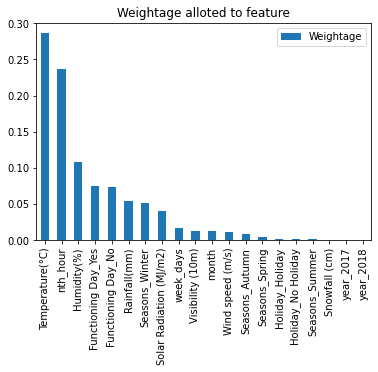

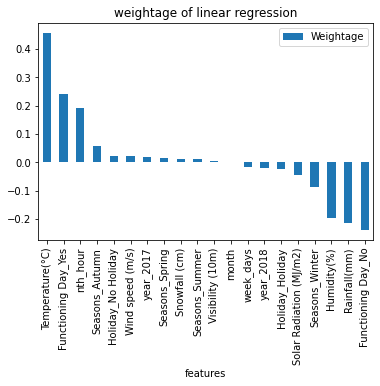

In [715]:
weight_df=pd.DataFrame({'Weightage':regressor.feature_importances_},index=X_col_list)
weight_df.sort_values(by='Weightage',ascending=False).plot(kind='bar')
plt.title("Weightage alloted to feature")

lin_reg=lin_reg.rename(columns={'index':'features'})
lin_reg.sort_values(by='Weightage',ascending=False).set_index('features').plot(kind='bar')
plt.title('weightage of linear regression')

plt.show()

In [716]:
top_6_features=weight_df.sort_values(by='Weightage',ascending=False).head(6).index.to_list()

# Now executing the code using only top 6 features
X=df[top_6_features]
y
#performing train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# random forest -8 (using grid search cv and feature_selection) 

#creating a model using RFG
grid_values={'n_estimators': [40,50,60,70],'max_depth':[5,6,7,8]}
regressor=RandomForestRegressor(n_jobs=-1,random_state=42,max_features='auto',verbose=0) # from above diagram lets assume 6 level
regressor=GridSearchCV(regressor,grid_values,scoring='r2',cv=5)

#training the model with X_train and y_train.
regressor.fit(X_train,y_train)

#lets know the parameters
print(regressor.get_params)

# predict using the regressor model created:
y_train_pred_rf=regressor.predict(X_train)
y_test_pred_rf=regressor.predict(X_test)

# since working in decision tree, lets us try the accuracy of its model

print('The r2 score of RF2 for train dataset {}'.format(r2_score(y_train, y_train_pred_rf)))
print('The r2 score of RF2 for test dataset {}'.format(r2_score(y_test, y_test_pred_rf)))

reg_score_train=r2_score(y_train, y_train_pred_rf)
reg_score_test=r2_score(y_test, y_test_pred_rf)

rmse_train= np.sqrt(mean_squared_error(y_train,y_train_pred_rf))
rmse_test= np.sqrt(mean_squared_error(y_test,y_test_pred_rf))

# imputing the tree on model
rf_dict={'Model':'Random Forest-8','r2_score_train_':reg_score_train,'r2_score_test_':reg_score_test,'rmse_train':rmse_train,'rmse_test':rmse_test,'tweak':'feature selection with grid search'}
metric=metric.append(rf_dict,ignore_index=True)
metric

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'n_estimators': [40, 50, 60, 70]},
             scoring='r2')>
The r2 score of RF2 for train dataset 0.8775403147709367
The r2 score of RF2 for test dataset 0.8462237271717546


Model  ...                                         tweak
0  Linear Regression  ...                       No hyperparmater tuning
1      Decision Tree  ...                       No hyperparmater tuning
2    Random Forest-1  ...                       No hyperparmater tuning
3    Random Forest-2  ...                                   max_depth-6
4    Random Forest-7  ...  cv=7,max_features=auto,change in n_estimator
5    Random Forest-8  ...            feature selection with grid search

[6 rows x 6 columns]

## XGboost tree

In [717]:
from xgboost import XGBRegressor

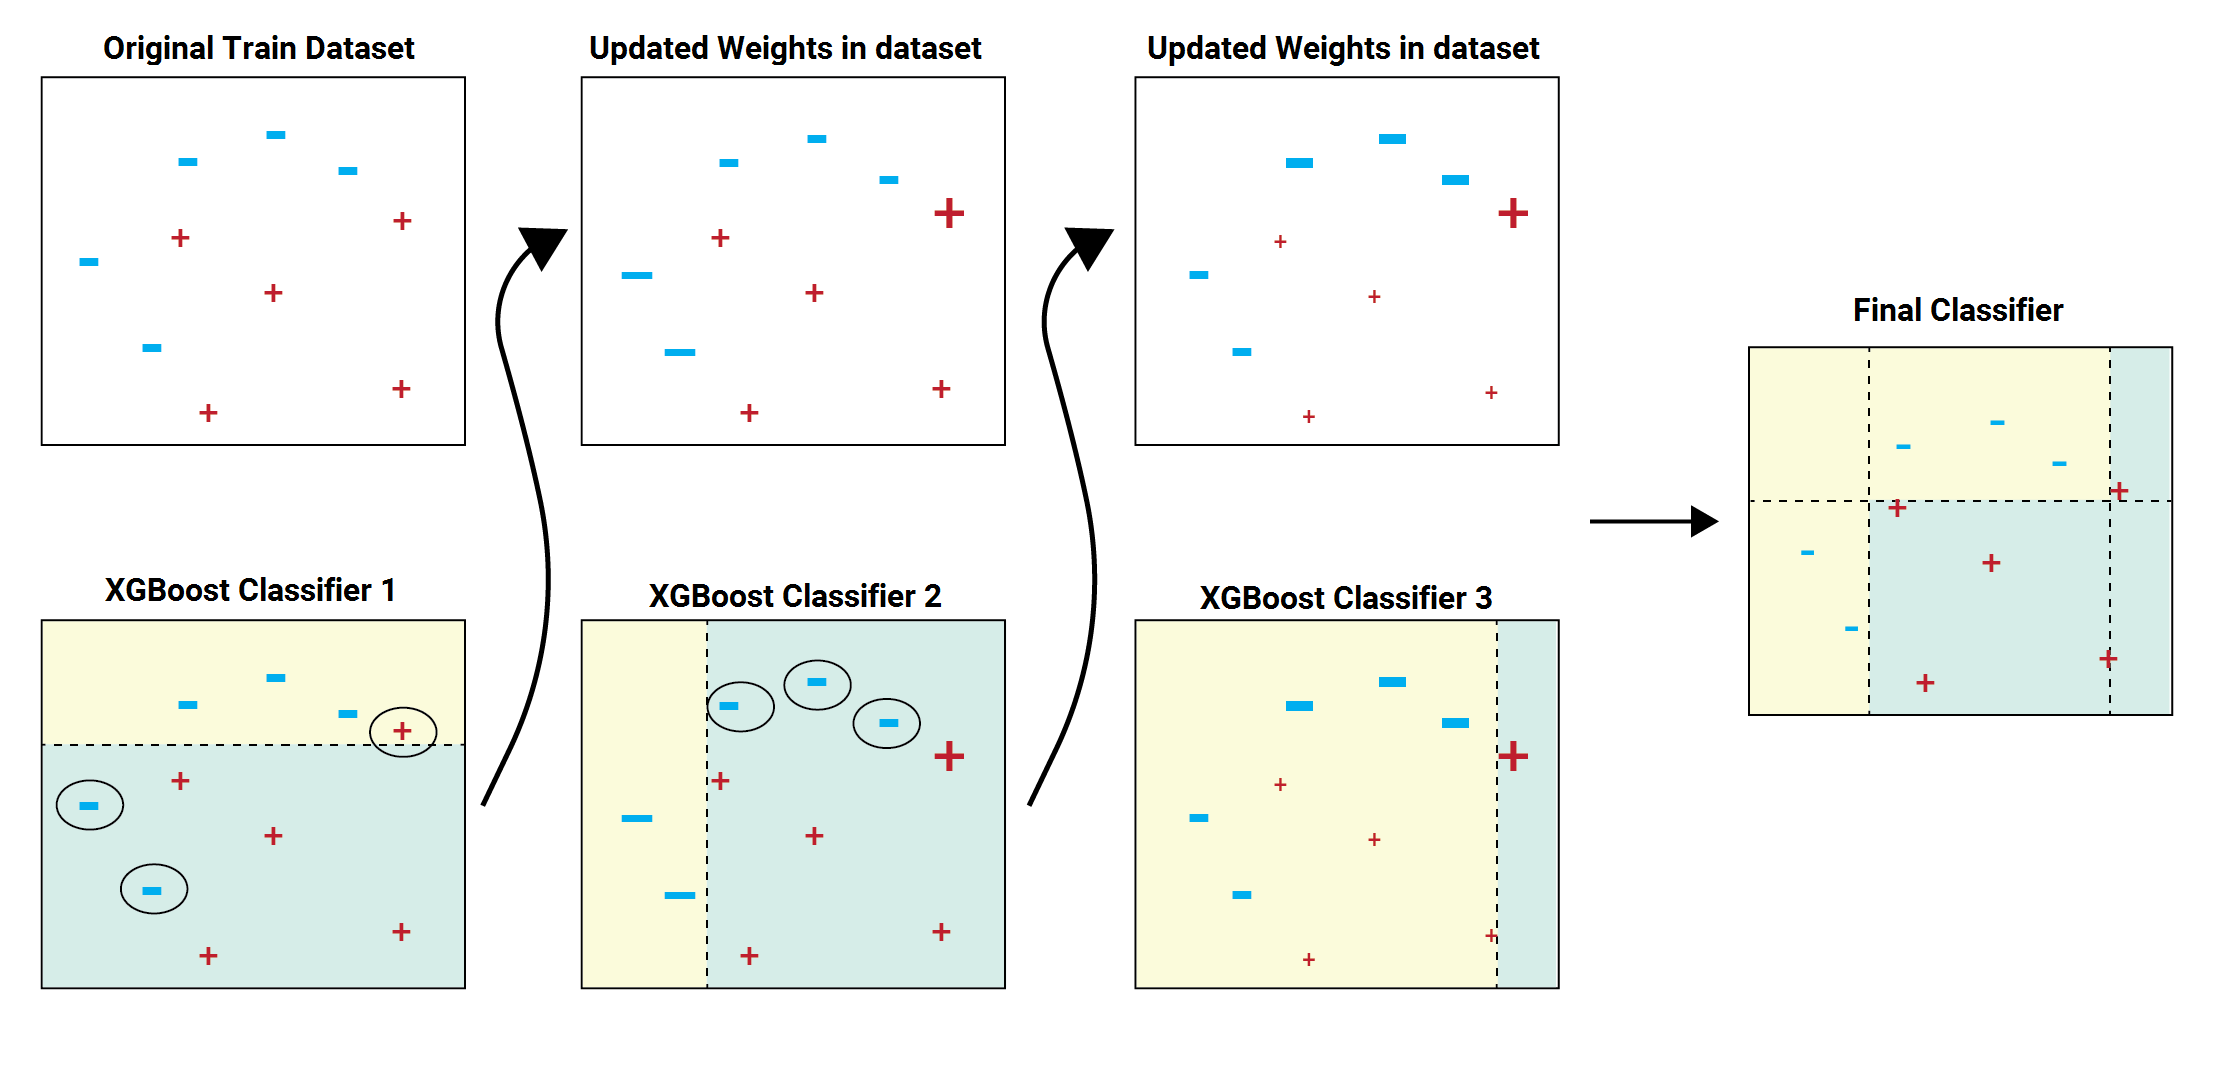

**XGB**
1. It is an algorithm build on GBM(Gradient boosting model)
2. Since it runs the tree parallelely they are fast and efficient. Due to the boosting type model they are accurate in nature.

**General Parameters:**
1. booster : two types i) gblinear(uses linear parameters) ii)gbtree
(uses tree based algorithm)
2. verbosity: printing of message 0=silent,1=warning,2=info,3=debug

**Tree parameters **
1. eta: (learning rate=0.3(default))- when the learning rate increases the model becomes more conservative which means they dont get into indepth information. Instead if we set very low it may cause to indefinite time and also over fitting. Selection of hyperparameter via gridsearch could help this issue.

2. gamma: Loss reduction. means the minimum loss required to split the leaf node. Larger the gamma the model becomes more conservative

3. min_child_weight : suppose a split is giving a leaf node or terminal node and if sum of the weights of instances less than min_child_weight then it wont perform split.
Higher min_child_weight more threshold to split thus it makes them conservative.





In [718]:
xgb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bike_count_per_hour      8760 non-null   float64
 1   nth_hour                 8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   month                    8760 non-null   int64  
 10  week_days                8760 non-null   int64  
 11  Seasons_Autumn           8760 non-null   uint8  
 12  Seasons_Spring           8760 non-null   uint8  
 13  Seasons_Summer           8760 non-null   uint8  
 14  Seasons_Winter          

In [719]:
# let us assign the x and y for train test split

X_col_list=xgb_df.columns.drop('bike_count_per_hour')
y_col_list=['bike_count_per_hour']
X=xgb_df[X_col_list]  # we are imputing the first 90% data as remaining 10% is unknown to check our predictability.
y=xgb_df[y_col_list]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [720]:
# XGBoost  -1 (using grid search cv) 

#creating a model using RFG
grid_values={'n_estimators':[58,60,65],'max_depth':[6],'learning_rate':[0.1,0.01,0.3,0.001],'gamma':[0.5,0.6,0.7,0.8]}
regressor=XGBRegressor(booster='gbtree') # from above diagram lets assume 6 level
regressor=GridSearchCV(regressor,grid_values,scoring='r2',cv=7)

#training the model with X_train and y_train.
regressor.fit(X_train,y_train)
print('__'*100)
print('__'*100)

# predict using the regressor model created:
y_train_pred_rf=regressor.predict(X_train)
y_test_pred_rf=regressor.predict(X_test)

print('__'*100)
print('__'*100)

# since working in decision tree, lets us try the accuracy of its model


print('The r2 score of RF2 for train dataset {}'.format(r2_score(y_train, y_train_pred_rf)))
print('The r2 score of RF2 for test dataset {}'.format(r2_score(y_test, y_test_pred_rf)))

reg_score_train=r2_score(y_train, y_train_pred_rf)
reg_score_test=r2_score(y_test, y_test_pred_rf)

rmse_train= np.sqrt(mean_squared_error(y_train,y_train_pred_rf))
rmse_test= np.sqrt(mean_squared_error(y_test,y_test_pred_rf))

rf_dict={'Model':'XGB-1','r2_score_train_':reg_score_train,'r2_score_test_':reg_score_test,'rmse_train':rmse_train,'rmse_test':rmse_test,'tweak':'gbtree,grid search'}
metric=metric.append(rf_dict,ignore_index=True)
metric

[07:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Model  ...                                         tweak
0  Linear Regression  ...                       No hyperparmater tuning
1      Decision Tree  ...                       No hyperparmater tuning
2    Random Forest-1  ...                       No hyperparmater tuning
3    Random Forest-2  ...                                   max_depth-6
4    Random Forest-7  ...  cv=7,max_features=auto,change in n_estimator
5    Random Forest-8  ...            feature selection with grid search
6              XGB-1  ...                            gbtree,grid search

[7 rows x 6 columns]

In [721]:
regressor.best_estimator_

XGBRegressor(gamma=0.8, learning_rate=0.3, max_depth=6, n_estimators=65)

In [722]:
regressor.best_params_

{'gamma': 0.8, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 65}

In [723]:
regressor.best_score_

0.9225771916951783

In [724]:
# XGB 2 with best features

#creating a model using RFG

regressor = XGBRegressor(
 learning_rate =0.3,
 n_estimators=150,
 max_depth=6,
 min_child_weight=7,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.85,
 nthread=4,
 seed=27,)

#training the model with X_train and y_train.
regressor.fit(X_train,y_train)
print('__'*100)
print('__'*100)

# predict using the regressor model created:
y_train_pred_rf=regressor.predict(X_train)
y_test_pred_rf=regressor.predict(X_test)

print('__'*100)
print('__'*100)

# since working in decision tree, lets us try the accuracy of its model


print('The r2 score of RF2 for train dataset {}'.format(r2_score(y_train, y_train_pred_rf)))
print('The r2 score of RF2 for test dataset {}'.format(r2_score(y_test, y_test_pred_rf)))

reg_score_train=r2_score(y_train, y_train_pred_rf)
reg_score_test=r2_score(y_test, y_test_pred_rf)

rmse_train= np.sqrt(mean_squared_error(y_train,y_train_pred_rf))
rmse_test= np.sqrt(mean_squared_error(y_test,y_test_pred_rf))




[07:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
The r2 score of RF2 for train dataset 0.9881574600939192
The r2 score

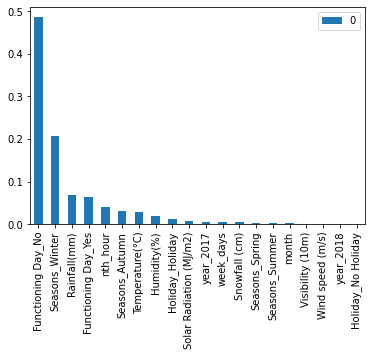

In [725]:
len(regressor.feature_importances_)==len(xgb_df.columns.drop('bike_count_per_hour'))
feature_imp_df=pd.DataFrame(regressor.feature_importances_,index=(xgb_df.columns.drop('bike_count_per_hour')))
feature_imp_df.sort_values(by=0,ascending=False).plot(kind='bar')


In [726]:
# XGBoost  -2 (using grid search cv) 

#creating a model using RFG
grid_values={'n_estimators':[58,60,65],'max_depth':[6],'learning_rate':[0.1,0.01,0.3,0.001],'gamma':[0.5,0.6,0.7,0.8]}
regressor=XGBRegressor(booster='gblinear') # from above diagram lets assume 6 level
regressor=GridSearchCV(regressor,grid_values,scoring='r2',cv=7)

#training the model with X_train and y_train.
regressor.fit(X_train,y_train)
print('__'*100)
print('__'*100)

# predict using the regressor model created:
y_train_pred_rf=regressor.predict(X_train)
y_test_pred_rf=regressor.predict(X_test)

print('__'*100)
print('__'*100)
# since working in decision tree, lets us try the accuracy of its model

print('The r2 score of RF2 for train dataset {}'.format(r2_score(y_train, y_train_pred_rf)))
print('The r2 score of RF2 for test dataset {}'.format(r2_score(y_test, y_test_pred_rf)))

reg_score_train=r2_score(y_train, y_train_pred_rf)
reg_score_test=r2_score(y_test, y_test_pred_rf)

rmse_train= np.sqrt(mean_squared_error(y_train,y_train_pred_rf))
rmse_test= np.sqrt(mean_squared_error(y_test,y_test_pred_rf))

rf_dict={'Model':'XGB-2','r2_score_train_':reg_score_train,'r2_score_test_':reg_score_test,'rmse_train':rmse_train,'rmse_test':rmse_test,'tweak':'gblinear,grid search'}
metric=metric.append(rf_dict,ignore_index=True)
metric

[07:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Model  ...                                         tweak
0  Linear Regression  ...                       No hyperparmater tuning
1      Decision Tree  ...                       No hyperparmater tuning
2    Random Forest-1  ...                       No hyperparmater tuning
3    Random Forest-2  ...                                   max_depth-6
4    Random Forest-7  ...  cv=7,max_features=auto,change in n_estimator
5    Random Forest-8  ...            feature selection with grid search
6              XGB-1  ...                            gbtree,grid search
7              XGB-2  ...                          gblinear,grid search

[8 rows x 6 columns]

In [727]:
l=np.concatenate((y_train_pred,y_test_pred),axis=0)
xgb_df['predicted_values']=l

In [728]:
xgb_df[['Functioning Day_No','bike_count_per_hour','predicted_values']]

Functioning Day_No  bike_count_per_hour  predicted_values
0                      0            15.937377          0.269243
1                      0            14.282857          0.696238
2                      0            13.152946          0.537673
3                      0            10.344080          0.489343
4                      0             8.831761          0.489343
...                  ...                  ...               ...
8755                   0            31.670175          0.000000
8756                   0            27.640550          0.537673
8757                   0            26.343880          0.212475
8758                   0            26.683328          0.489343
8759                   0            24.166092          0.212475

[8760 rows x 3 columns]

[07:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel

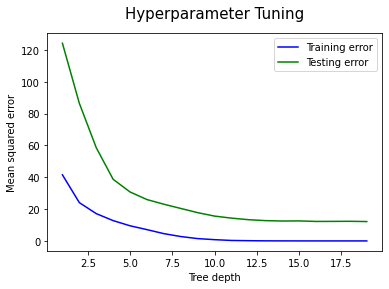

<Figure size 432x288 with 0 Axes>

In [729]:
# for hyper parameter tuning

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = XGBRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = RandomForestRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

sns.lineplot(max_depths, training_error, color='blue', label='Training error')
sns.lineplot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.figure()
plt.show()

**Conclusion**
1. We have analysed each features how they are distributed, we treated the outliers for better model prediction.
2. We have imputed the linear algorithm model, RandomForest regressor and XGboost regressor as our problem is  regression type.
3. The best accuracy is given by XGboost.
4. The time consumption of running of randomforest regressor was higher more than 2 minutes per iteration where as Xgb consumed less than 70 sec which is remarkable.
5. for smoother decision of bike count , we have to foremoost these variable
  i) Functioning day
  ii) Season where winter is more preferred
  iii) Rain fall presence
  iv) nth hour
  v) Temperature of the day

6. My solution for nth hour bike prediction is that we can input the feature importance(XGB) of each variable and predict the rented bike count.

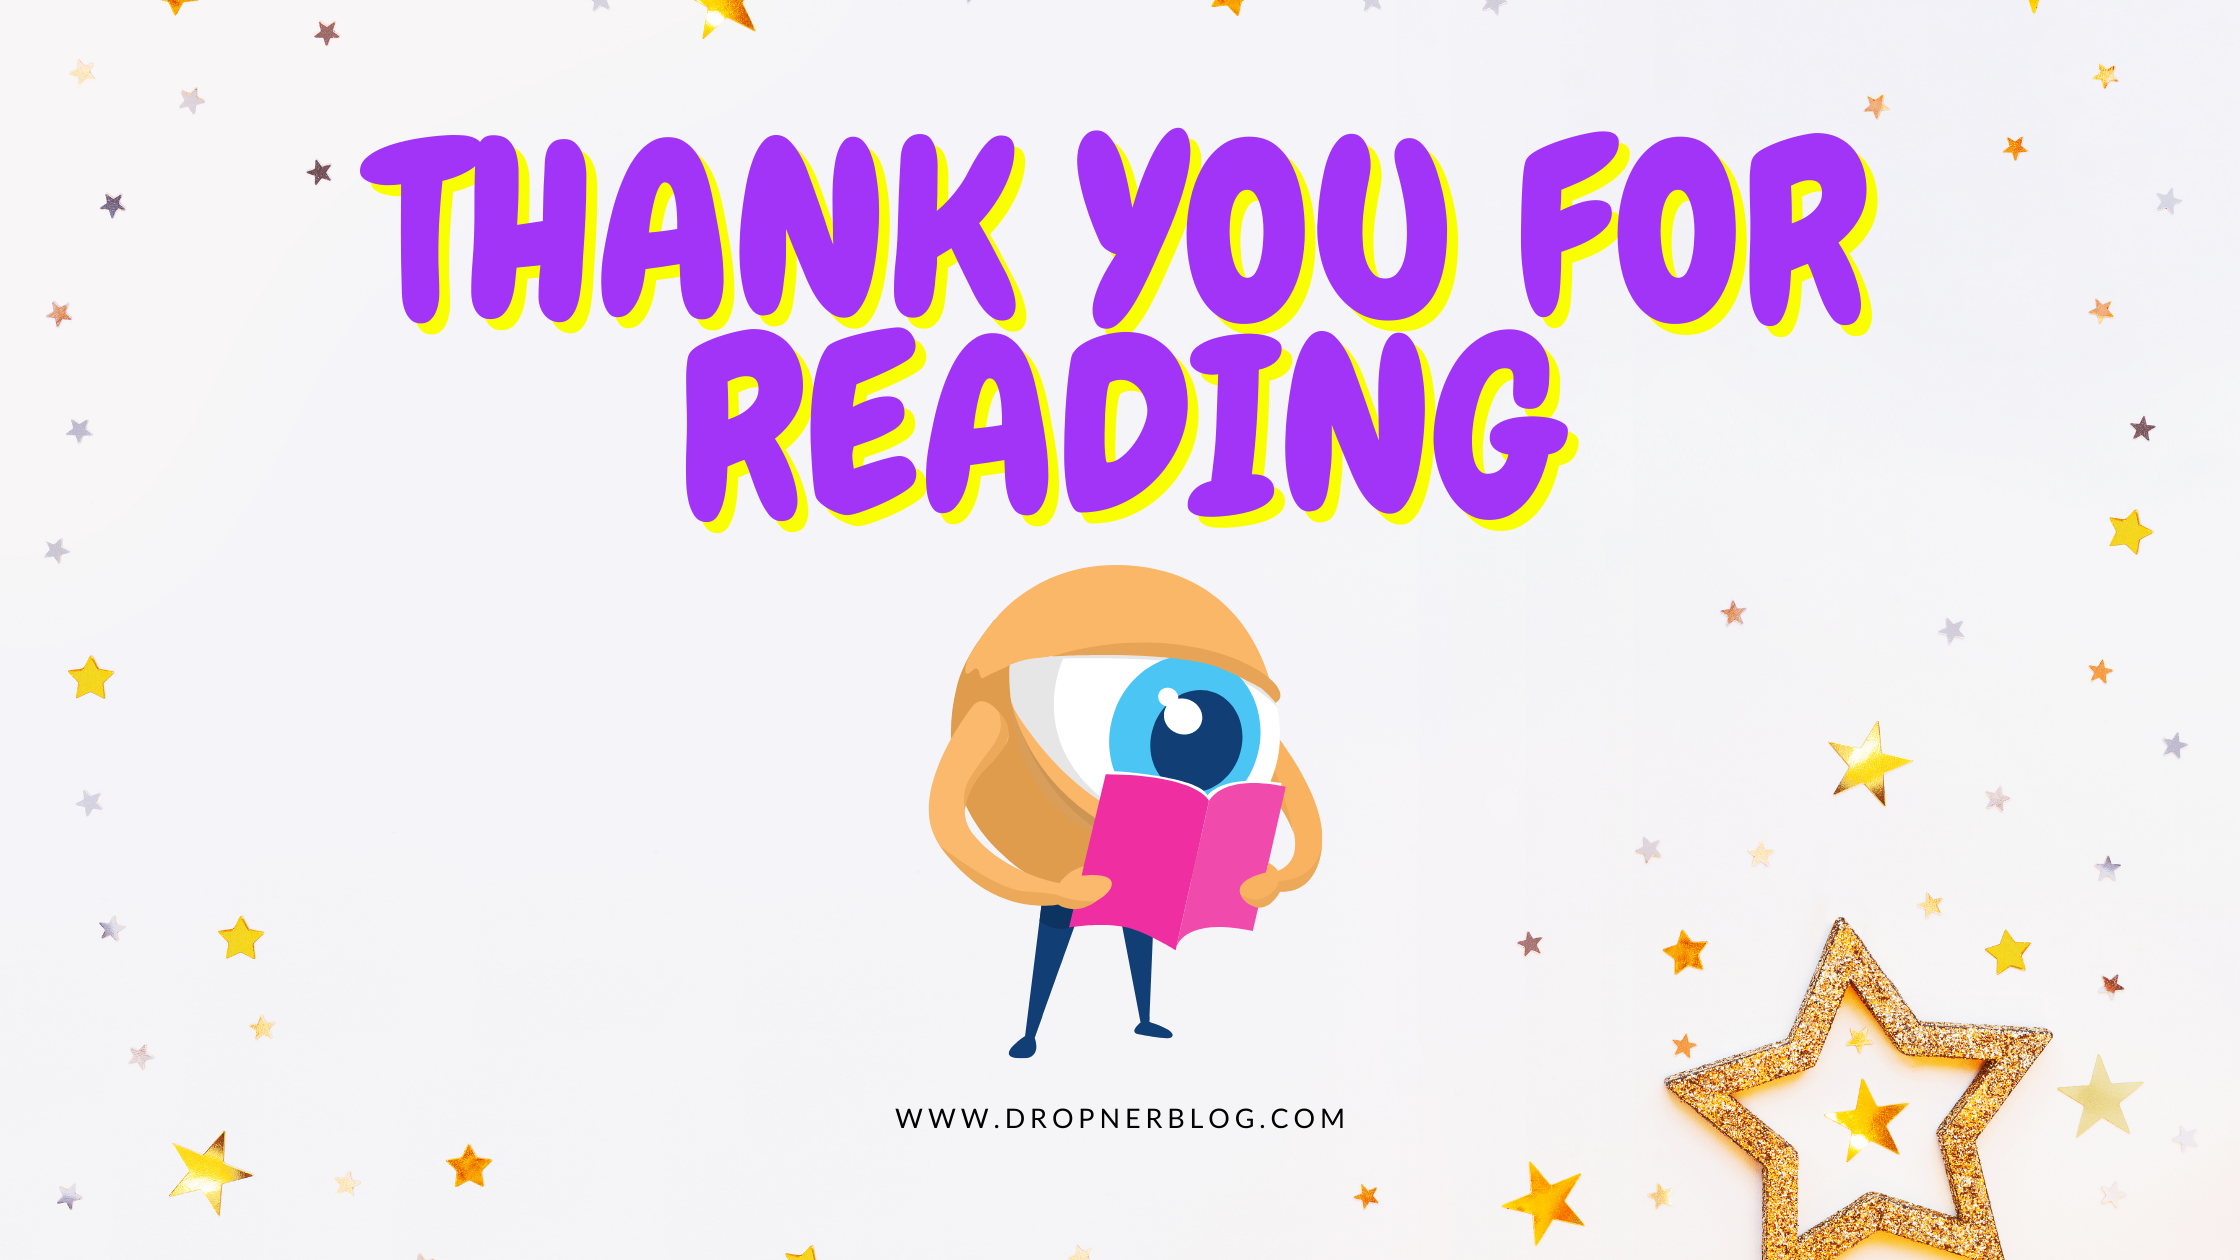